In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.express as px

In [2]:
!pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79.9 MB 1.2 MB/s 


In [2]:
df = pd.read_csv('/content/forFBpost.csv', sep = ';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30250 entries, 0 to 30249
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Город            30250 non-null  object 
 1   year             30250 non-null  int64  
 2   fact             3250 non-null   float64
 3   Модель           30250 non-null  float64
 4   Нижняя граница   30250 non-null  float64
 5   Верхняя граница  30250 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 1.4+ MB


In [3]:
df

,Город,year,fact,Модель,Нижняя граница,Верхняя граница
0,Белокуриха,2000,NaN,15400.0,15100.0,15700.0
1,Белокуриха,2001,NaN,15400.0,15100.0,15700.0
2,Белокуриха,2002,NaN,15400.0,15000.0,15700.0
3,Белокуриха,2003,NaN,15300.0,15000.0,15700.0
4,Белокуриха,2004,NaN,15300.0,14900.0,15600.0
...,...,...,...,...,...,...
30245,Облучье,2116,NaN,300.0,100.0,800.0
30246,Облучье,2117,NaN,300.0,100.0,800.0
30247,Облучье,2118,NaN,300.0,100.0,800.0
30248,Облучье,2119,NaN,300.0,100.0,800.0


In [6]:
df[df.isnull().any(1)]

,Город,year,fact,Модель,Нижняя граница,Верхняя граница
0,Белокуриха,2000,NaN,15400.0,15100.0,15700.0
1,Белокуриха,2001,NaN,15400.0,15100.0,15700.0
2,Белокуриха,2002,NaN,15400.0,15000.0,15700.0
3,Белокуриха,2003,NaN,15300.0,15000.0,15700.0
4,Белокуриха,2004,NaN,15300.0,14900.0,15600.0
...,...,...,...,...,...,...
30245,Облучье,2116,NaN,300.0,100.0,800.0
30246,Облучье,2117,NaN,300.0,100.0,800.0
30247,Облучье,2118,NaN,300.0,100.0,800.0
30248,Облучье,2119,NaN,300.0,100.0,800.0


In [7]:
df['Город'].unique()

array(['Белокуриха', 'Новоалтайск', 'Краснодар', 'Анапа', 'Бородино',
       'Шарыпово', 'Большой Камень', 'Партизанск', 'Ессентуки',
       'Лермонтов', 'Невинномысск', 'Николаевск-на-Амуре', 'Завитинск',
       'Белогорск', 'Райчихинск', 'Шимановск', 'Сольвычегодск',
       'Архангельск', 'Новодвинск', 'Бирюч', 'Мглин', 'Почеп', 'Клинцы',
       'Карабаново', 'Гороховец', 'Курлово', 'Киржач', 'Петушки',
       'Костерево', 'Покров', 'Юрьев-Польский', 'Гусь-Хрустальный',
       'Калач-на-Дону', 'Новоаннинский', 'Серафимович', 'Краснослободск',
       'Камышин', 'Михайловка', 'Урюпинск', 'Фролово', 'Бабаево',
       'Красавино', 'Вытегра', 'Никольск', 'Сокол', 'Тотьма', 'Бобров',
       'Бутурлиновка', 'Калач', 'Лиски', 'Новохопёрск', 'Павловск',
       'Семилуки', 'Ветлуга', 'Городец', 'Володарск', 'Кстово', 'Сергач',
       'Арзамас', 'Дзержинск', 'Кулебаки', 'Навашино', 'Гаврилов Посад',
       'Заволжск', 'Наволоки', 'Плес', 'Приволжск', 'Пучеж', 'Фурманов',
       'Иваново', 'Кохм

# **Функция для вывода показателей численности жителей города**

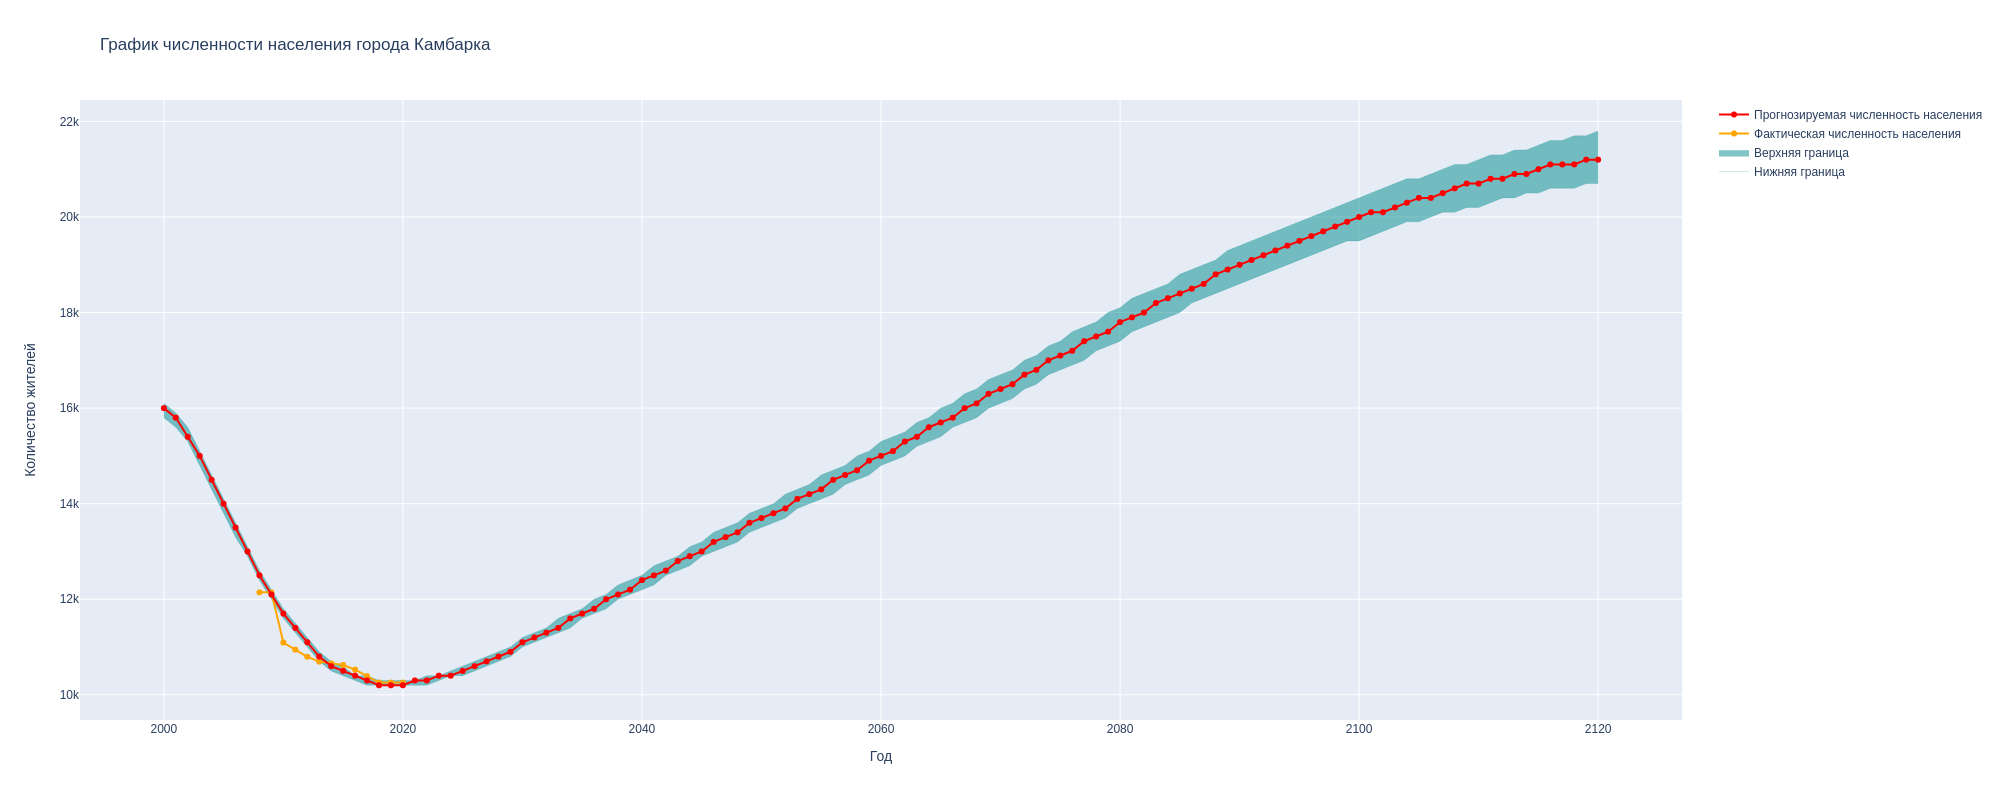

In [14]:
def city_population(city):
  df_1 = df[df['Город'] == city]

  fig = go.Figure()
  fig.update_layout(autosize=False,width=2000,height=800)

  fig.add_trace(go.Scatter(x=df_1["year"], y=df_1["Нижняя граница"],fill=None,mode='lines',line=dict(width=0.2, color='rgb(0,139,139)'), name='Нижняя граница'))
  fig.add_trace(go.Scatter(x=df_1["year"],y= df_1["Верхняя граница"],fill='tonexty',mode='lines', line=dict(width=0.2, color='rgb(0,139,139)'), name='Верхняя граница'))
  
  fig.add_trace(go.Scatter(x=df_1["year"], y=df_1["fact"],mode='lines+markers',line=dict(color='rgb(255,165,0)'),name='Фактическая численность населения'))
  fig.add_trace(go.Scatter(x=df_1["year"], y=df_1["Модель"],mode='lines+markers',line=dict(color='rgb(255,0,0)'),name='Прогнозируемая численность населения'))

  fig.update_xaxes(title='Год')
  fig.update_yaxes(title='Количество жителей')
  fig.update_layout(title=f"График численности населения города {city}")
  fig.show('png')

city_population('Камбарка')

# **График роста численности населения по всем городам по предсказаниям модели**

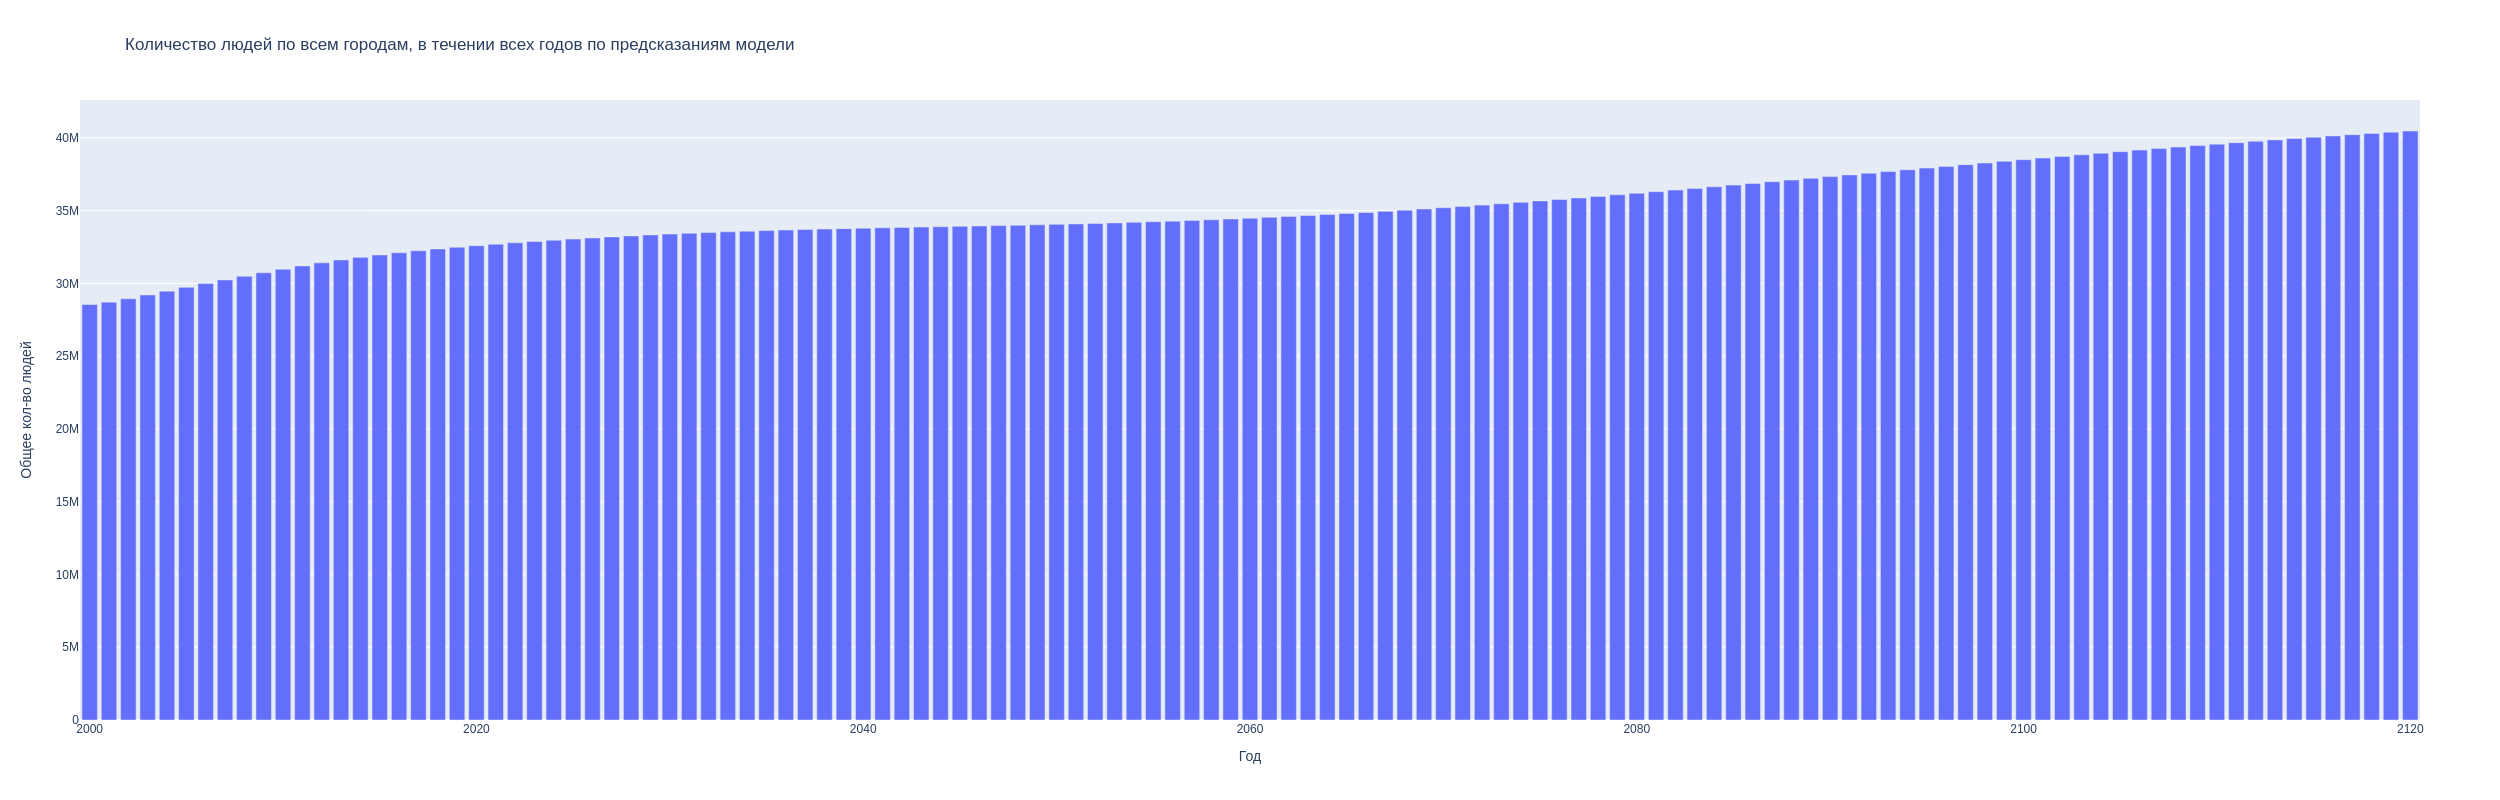

In [17]:
df_by_years = df.groupby(['year']).agg({'Модель': ['sum']}).reset_index()
df_by_years = pd.DataFrame({'Год': df_by_years['year'], 'Общее кол-во людей': df_by_years['Модель']['sum']})
fig = px.bar(df_by_years, x='Год',y = 'Общее кол-во людей',title = 'Количество людей по всем городам, в течении всех годов по предсказаниям модели', width=2500, height=800)
fig.show('png')

**По данному графику видна тенденция того, что рост населения по предсказаниям модели во всех городах вместе наблюдается непрерывно**

In [18]:
print('Прирост по модели по всем городам в количестве человек (период 2008-2020):', df_by_years['Общее кол-во людей'][20] - df_by_years['Общее кол-во людей'][8])
print('Прирост по модели по всем городам в процентах (период 2008-2020):', round((df_by_years['Общее кол-во людей'][20]*100)/df_by_years['Общее кол-во людей'][8]-100,2),'%')

print('Прирост по модели по всем городам в количестве человек (период 2010-2018):', df_by_years['Общее кол-во людей'][18] - df_by_years['Общее кол-во людей'][10])
print('Прирост по модели по всем городам в процентах (период 2010-2018):', round((df_by_years['Общее кол-во людей'][18]*100)/df_by_years['Общее кол-во людей'][10]-100,2),'%')

Прирост по модели по всем городам в количестве человек (период 2008-2020): 2105500.0
Прирост по модели по всем городам в процентах (период 2008-2020): 6.91 %
Прирост по модели по всем городам в количестве человек (период 2010-2018): 1393600.0
Прирост по модели по всем городам в процентах (период 2010-2018): 4.5 %


# **График роста численности населения по всем городам по фактическим данным**

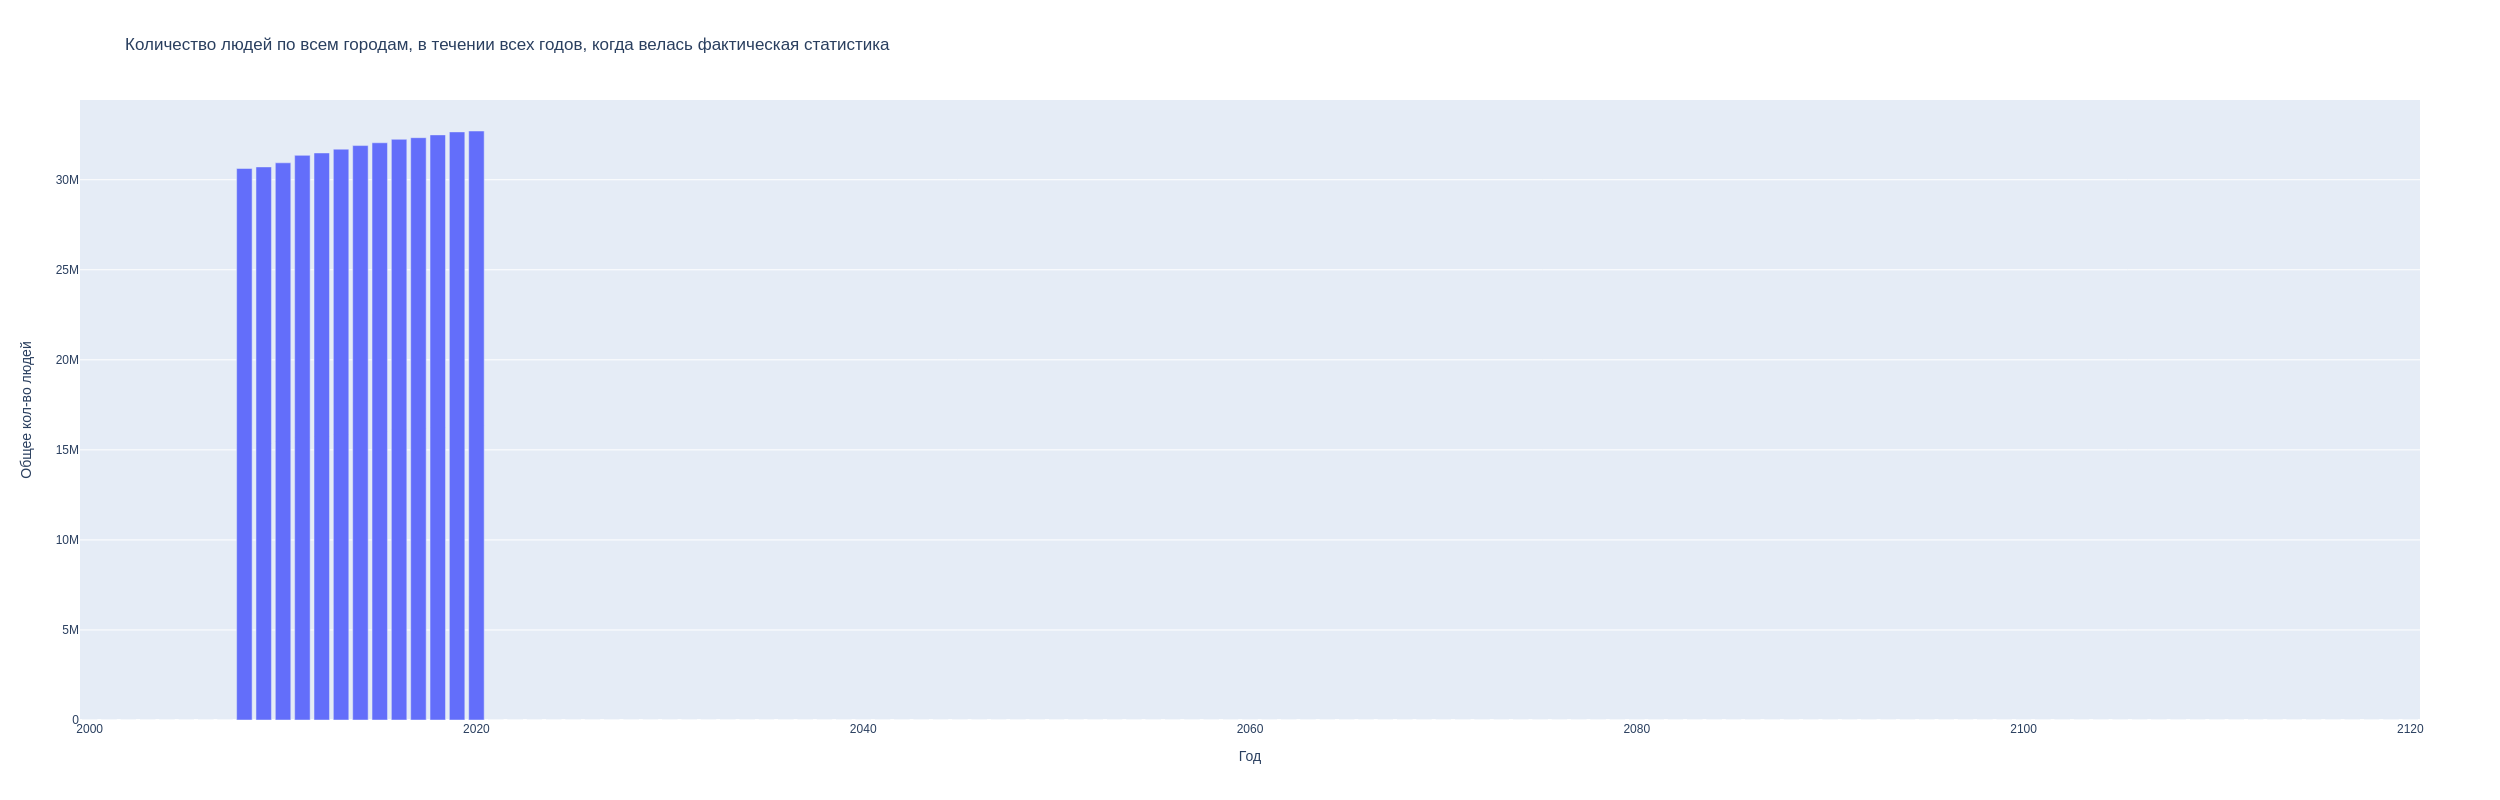

In [19]:
df_by_years_real = df.groupby(['year']).agg({'fact': ['sum']}).reset_index()
df_by_years_real = pd.DataFrame({'Год': df_by_years_real['year'], 'Общее кол-во людей': df_by_years_real['fact']['sum']})
fig = px.bar(df_by_years_real, x='Год',y = 'Общее кол-во людей',title = 'Количество людей по всем городам, в течении всех годов, когда велась фактическая статистика', width=2500, height=800)
fig.show('png') 

In [20]:
print('Прирост фактический по всем городам в количестве человек (период 2008-2020):', df_by_years_real['Общее кол-во людей'][20] - df_by_years_real['Общее кол-во людей'][8])
print('Прирост фактический по всем городам в процентах (период 2008-2020):', round((df_by_years_real['Общее кол-во людей'][20]*100)/df_by_years_real['Общее кол-во людей'][8]-100,2),'%')

print('Прирост фактический по всем городам в количестве человек (период 2010-2018):', df_by_years_real['Общее кол-во людей'][18] - df_by_years_real['Общее кол-во людей'][10])
print('Прирост фактический по всем городам в процентах (период 2010-2018):', round((df_by_years_real['Общее кол-во людей'][18]*100)/df_by_years_real['Общее кол-во людей'][10]-100,2),'%')

Прирост фактический по всем городам в количестве человек (период 2008-2020): 2081865.0
Прирост фактический по всем городам в процентах (период 2008-2020): 6.8 %
Прирост фактический по всем городам в количестве человек (период 2010-2018): 1550124.0
Прирост фактический по всем городам в процентах (период 2010-2018): 5.01 %


**Сравним значение выше с показателям из открытых источников, ближайший период к 2008-2020, который был найден в открытых источниках, это период с 2010 по 2018.Также был рассмотрен отдельно период с 2010 по 2018.**

**Рассмотрев прирост в самых населённых странах мира, можно понять, что за период с 2010 по 2018 по России был прирост 0,99%, в связи с чем можно сделать вывод, что прирост во всем количестве городов больше чем в среднем по России в приблизительно 4,5 раза.** 

**В сравнении с Китаем за тот же период в котором прирост населения составляет 3,23% , видим что прирост в данных городах больше, вероятнее всего данная разница связана с тем, что в Китае введена политика "Одна семья-один ребенок".**

**Также сравним с США, которая по экономическим показателям более развитая страна, соответсвенно качество жизни в этой стране лучше.В США за период с 2010 по 2018 прирост населения составляет 6,08%, что можно связать с тем, что данные по фактической численности представлены в период с 2008, когда уже наступил конец ипотечного кризиса в США, в России при этом наблюдались кризисы в период с 2008 по 2010, а также в период с 2014 по 2015, в связи с чем можно сделать вывод о том, что в кризис люди в развитых странах больше задумываются при рождении детей, в связи с чем процент увеличения населения падает.**

**С менее развитыми странами, такими как Нигерия или Пакистан сравнивать процент нет смысла, так как процент прироста в этих странах 28,42% и 19,74% соответсвенно, в связи с чем можно сделать вывод, что в странах с плохим экономическим развитием за собой идут проблемы образование и другое, в связи с чем люди меньше задумываются о содержании детей, в связи с чем рождаемость резко увеличивается.**

**Далее рассмотрим прирост за этот период в топ 10 больших городов России,топ 10 маленьких по населению и других городах и рассмотрим изменение прироста в больших городах и маленьких, для понимания влияют ли условие проживание в больших городах на прирост населения.**

# **Анализ изменения численности населения по топ 10 больших, топ 10 маленьких и остальных городов**

In [21]:
df_by_max_peoples = df.groupby(['Город']).agg({'fact': ['max']}).reset_index()
df_by_max_peoples.sort_values(by=('fact','max'), ascending=False).head(10)

,Город,fact
,,max
139,Москва,12678079.0
3,Уфа,1138886.0
110,Краснодар,1014996.0
213,Тольятти,721049.0
221,Ульяновск,650493.0
246,Ярославль,609275.0
214,Томск,597133.0
166,Оренбург,587197.0
141,Набережные Челны,533873.0


In [22]:
list_of_top_10_cities = list(df_by_max_peoples.sort_values(by=('fact','max'), ascending=False).head(10)['Город'])
df_big_cities = df.loc[df['Город'].isin(list_of_top_10_cities) & df['year'].isin([2010,2018])].reset_index()

resultant_average_growth_in_percent_for_top_10 = 0
for i in range(0,2*len(list_of_top_10_cities),2):
  resultant_average_growth_in_percent_for_top_10 += (df_big_cities['fact'][i+1]*100)/df_big_cities['fact'][i]-100

resultant_average_growth_in_percent_for_top_10 /= len(list_of_top_10_cities)
df_big_cities

,index,Город,year,fact,Модель,Нижняя граница,Верхняя граница
0,252,Краснодар,2010,830536.0,813000.0,797300.0,829000.0
1,260,Краснодар,2018,999084.0,973900.0,958100.0,989900.0
2,13562,Тольятти,2010,719514.0,720400.0,717700.0,723100.0
3,13570,Тольятти,2018,705119.0,709200.0,706700.0,711700.0
4,15740,Москва,2010,11382161.0,11426300.0,11382000.0,11470800.0
5,15748,Москва,2018,12506468.0,12454600.0,12416600.0,12492700.0
6,17918,Оренбург,2010,563876.0,551000.0,545800.0,556300.0
7,17926,Оренбург,2018,580051.0,585100.0,580400.0,589800.0
8,18644,Пенза,2010,517205.0,511700.0,510700.0,512700.0
9,18652,Пенза,2018,522935.0,523300.0,522800.0,523900.0


In [23]:
resultant_average_growth_in_percent_for_top_10

5.43746886214758

In [24]:
df_small_cities = df.loc[~df['Город'].isin(list_of_top_10_cities) & df['year'].isin([2010,2018])].reset_index()

resultant_average_growth_in_percent_for_small_cities = 0
for i in range(0,len(df_small_cities),2):
  resultant_average_growth_in_percent_for_small_cities += (df_small_cities['fact'][i+1]*100)/df_small_cities['fact'][i]-100

resultant_average_growth_in_percent_for_small_cities /= (2*len(df_small_cities))
df_small_cities

,index,Город,year,fact,Модель,Нижняя граница,Верхняя граница
0,10,Белокуриха,2010,14701.0,14700.0,14400.0,15100.0
1,18,Белокуриха,2018,15170.0,14900.0,14600.0,15300.0
2,131,Новоалтайск,2010,70441.0,70800.0,69900.0,71600.0
3,139,Новоалтайск,2018,73604.0,73000.0,72200.0,73800.0
4,373,Анапа,2010,146475.0,148000.0,143600.0,152600.0
...,...,...,...,...,...,...,...
475,29905,Мирный,2018,35079.0,34800.0,34300.0,35300.0
476,30018,Якутск,2010,285106.0,286600.0,285400.0,287800.0
477,30026,Якутск,2018,332009.0,326200.0,325800.0,326700.0
478,30139,Облучье,2010,9182.0,9300.0,8900.0,9600.0


In [25]:
resultant_average_growth_in_percent_for_small_cities

-0.4074937861142221

In [26]:
list_of_tail_10_cities = list(df_by_max_peoples.sort_values(by=('fact','max'), ascending=False).tail(10)['Город'])
df_smallest_cities = df.loc[df['Город'].isin(list_of_tail_10_cities) & df['year'].isin([2010,2018])].reset_index()

resultant_average_growth_in_percent_for_tail_10 = 0
for i in range(0,2*len(list_of_tail_10_cities),2):
  resultant_average_growth_in_percent_for_tail_10 += (df_smallest_cities['fact'][i+1]*100)/df_smallest_cities['fact'][i]-100

resultant_average_growth_in_percent_for_tail_10  /= len(list_of_tail_10_cities)
df_smallest_cities

,index,Город,year,fact,Модель,Нижняя граница,Верхняя граница
0,1946,Сольвычегодск,2010,4425.0,4400.0,4300.0,4500.0
1,1954,Сольвычегодск,2018,4092.0,4200.0,4100.0,4300.0
2,3035,Курлово,2010,6817.0,6800.0,6700.0,6800.0
3,3043,Курлово,2018,5925.0,6100.0,6000.0,6100.0
4,6060,Новохопёрск,2010,6839.0,6800.0,6800.0,6800.0
5,6068,Новохопёрск,2018,6958.0,7000.0,7000.0,7000.0
6,7512,Гаврилов Посад,2010,6466.0,6600.0,6400.0,6800.0
7,7520,Гаврилов Посад,2018,6272.0,6500.0,6300.0,6700.0
8,7875,Плес,2010,2370.0,2700.0,2400.0,3000.0
9,7883,Плес,2018,2933.0,3100.0,2900.0,3400.0


In [27]:
resultant_average_growth_in_percent_for_tail_10 

-2.878313260268956

**Как видно из вычислений средний прирост по топ 10 самых больших по населению городов составил 5.438%, в тоже время прирост по всем остальным городам составил -0.408%. Для топ 10 самых маленьких городов по численности населения этот результат составил -2.878%.**

**В связи с чем можно сделать вывод о том. что большие города привлекают миграционные потоки людей, так как они видят в них большие перспективы и возможности, в связи с чем население этих городов увеличивается. Обратная ситуация состоит в том, что в маленьких городах люди чаще всего не видят перспектив и возможностей и переезжают в другие места, что можно видеть по фактическому уменьшению количества населения.**

**Также дополнительно можно преположить, что в больших городах семьи имеют более стабильную экономическую ситуацию в связи с чем чаще задумываются о рождении детей, но для проверки этой гипотезы нужна статистика рождаемости в городах, которая в данной таблице не представлена.**

# **Анализ точности модели**

**На примере разницы между предсказаниями модели и фактической численностью в 
количестве людей.**

In [28]:
df_model_analysis = df
df_model_analysis['Разница между фактом и моделью'] = df_model_analysis['Модель']- df_model_analysis['fact']
df_model_analysis['Разница между фактом и моделью'].describe()

count      3250.000000
mean       -378.662154
std        6010.535875
min     -189964.000000
25%        -116.000000
50%          41.000000
75%         245.750000
max       44139.000000
Name: Разница между фактом и моделью, dtype: float64

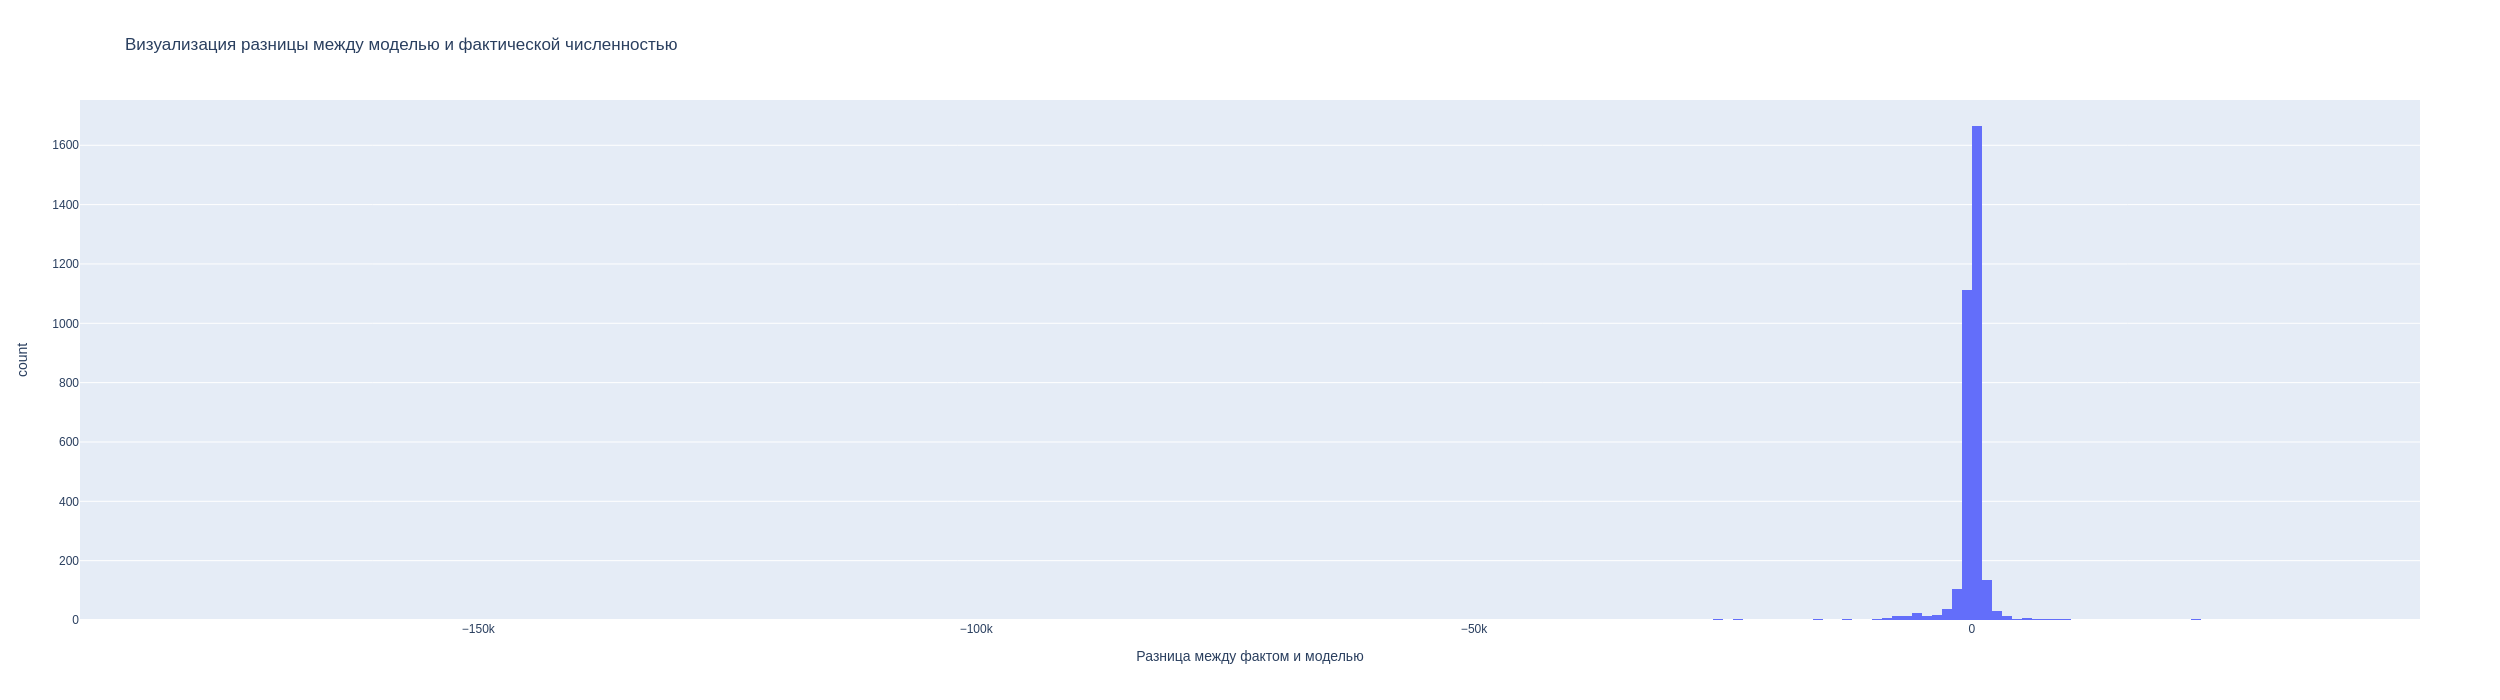

In [29]:
fig = px.histogram(df_model_analysis, x="Разница между фактом и моделью", nbins=250, title = 'Визуализация разницы между моделью и фактической численностью', width=2500, height=700)
fig.show('png')

**Видим, что в распределении присутсуют достаточно большие выбросы, при этом их количество составляет 632 единиц, из 3250 значений в датафрейме, для которых присутсвует фактическое значение населения в городе. Что составляет 19,45% процентов от всего количества**

In [30]:
minimum = -116.000000 - 1.5*(245.750000 - (-116.000000))
maximum = 245.750000 + 1.5*(245.750000 - (-116.000000))
print('Границы, за которыми значения являются выбросами:', '\n', 'Минимум:', minimum, '\n','Максимум:', maximum)
df_without_emissions = df_model_analysis[df_model_analysis['Разница между фактом и моделью'] > minimum]
df_without_emissions = df_without_emissions[df_without_emissions['Разница между фактом и моделью'] < maximum]

Границы, за которыми значения являются выбросами: 
 Минимум: -658.625 
 Максимум: 788.375


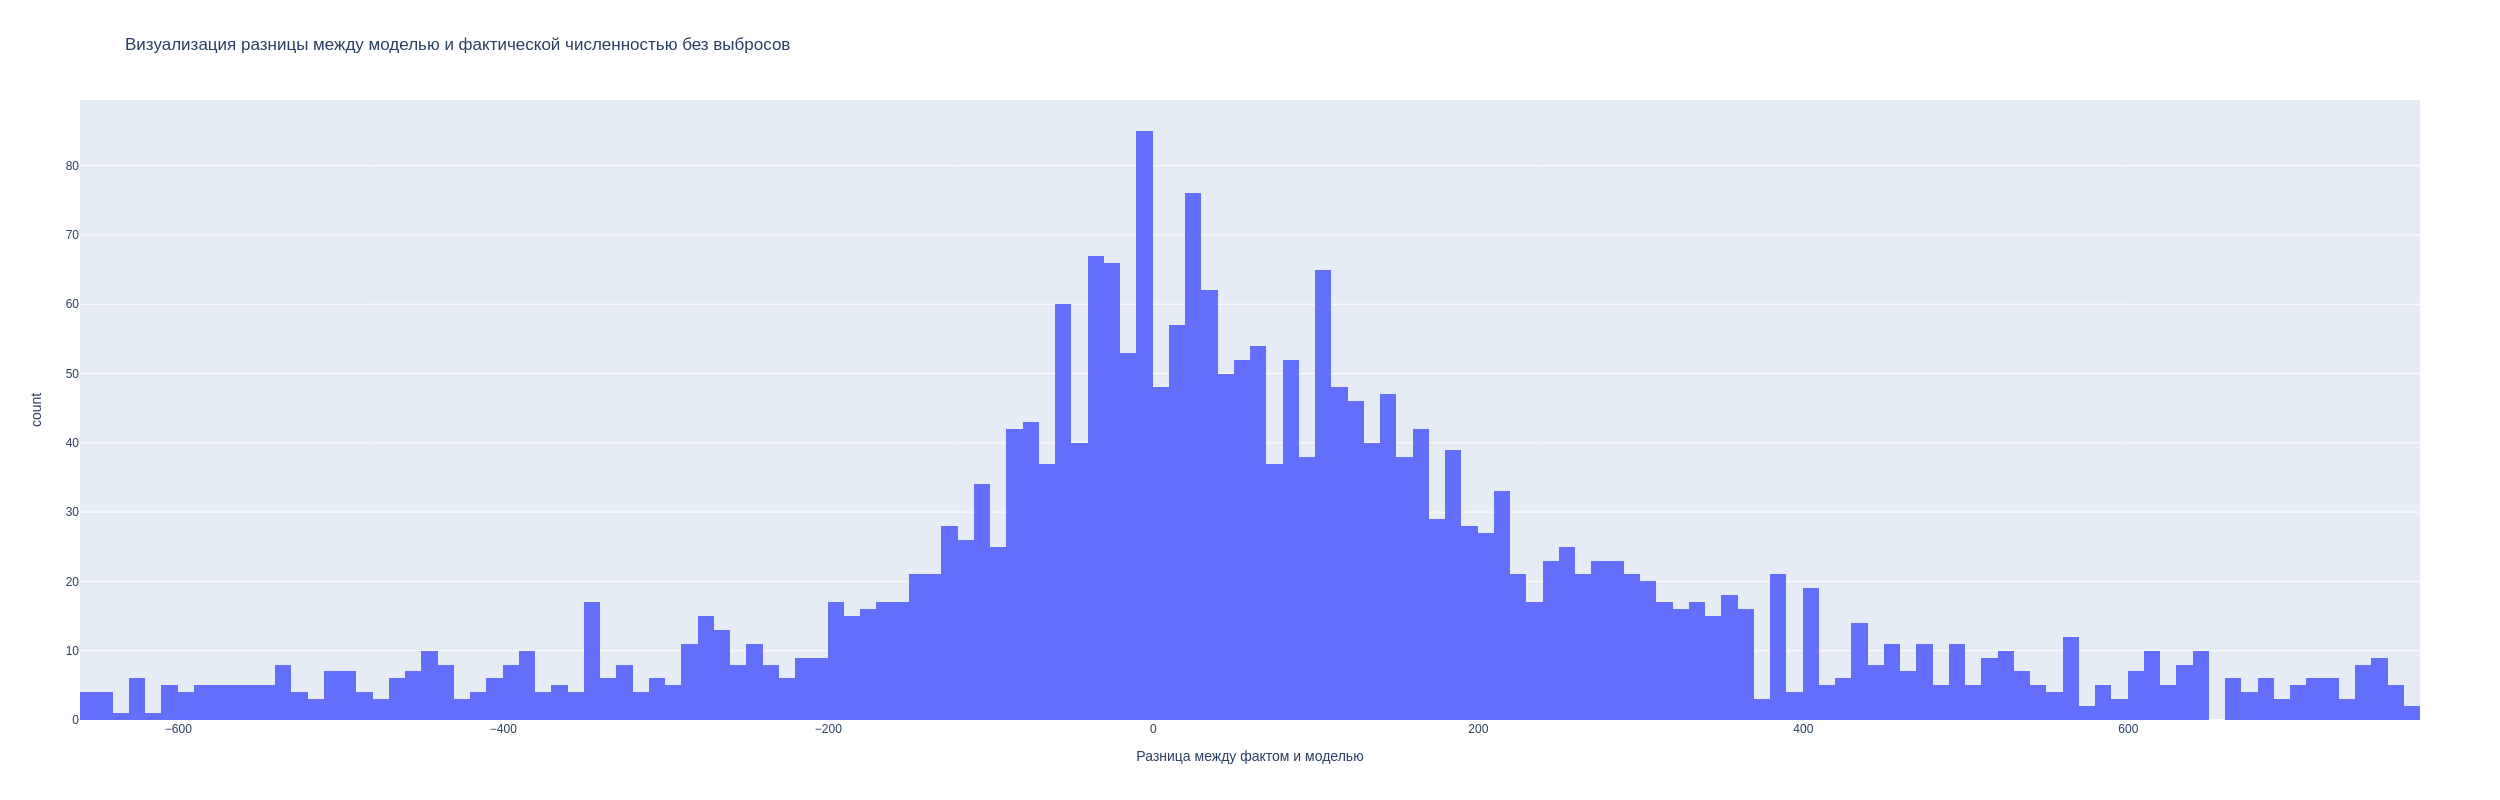

In [31]:
fig = px.histogram(df_without_emissions, x="Разница между фактом и моделью", nbins=250, title = 'Визуализация разницы между моделью и фактической численностью без выбросов', width=2500, height=800)
fig.show('png')

**Сверху представлен график разницы между фактом и моделью без учета выбросов, далее проанализируем выбросы.**

In [32]:
df_emissions_minus = df_model_analysis[df_model_analysis['Разница между фактом и моделью'] < minimum]
df_emissions_plus = df_model_analysis[df_model_analysis['Разница между фактом и моделью'] > maximum]

df_emissions_minus.sort_values(by='Разница между фактом и моделью')

,Город,year,fact,Модель,Нижняя граница,Верхняя граница,Разница между фактом и моделью
15741,Москва,2011,11776764.0,11586800.0,11543300.0,11630400.0,-189964.0
15742,Москва,2012,11856578.0,11737800.0,11695100.0,11780700.0,-118778.0
15738,Москва,2008,11186851.0,11079300.0,11033500.0,11125400.0,-107551.0
15743,Москва,2013,11979529.0,11879600.0,11837700.0,11921700.0,-99929.0
15744,Москва,2014,12108257.0,12011400.0,11970300.0,12052700.0,-96857.0
...,...,...,...,...,...,...,...
20948,Сысерть,2015,62382.0,61700.0,61100.0,62300.0,-682.0
5698,Бутурлиновка,2011,26781.0,26100.0,25700.0,26600.0,-681.0
2678,Клинцы,2016,69778.0,69100.0,68600.0,69700.0,-678.0
28696,Кызыл,2019,118671.0,118000.0,117700.0,118200.0,-671.0


In [33]:
df_emissions_plus.sort_values(by='Разница между фактом и моделью',ascending=False)

,Город,year,fact,Модель,Нижняя граница,Верхняя граница,Разница между фактом и моделью
15740,Москва,2010,11382161.0,11426300.0,11382000.0,11470800.0,44139.0
29416,Гудермес,2013,49205.0,73300.0,46300.0,116200.0,24095.0
29417,Гудермес,2014,50051.0,72600.0,45700.0,115500.0,22549.0
29415,Гудермес,2012,48360.0,70600.0,43900.0,113500.0,22240.0
29418,Гудермес,2015,50896.0,69000.0,42600.0,111800.0,18104.0
...,...,...,...,...,...,...,...
3767,Гусь-Хрустальный,2016,58600.0,59400.0,58700.0,60100.0,800.0
3765,Гусь-Хрустальный,2014,60200.0,61000.0,60200.0,61700.0,800.0
18895,Лысьва,2019,71401.0,72200.0,72000.0,72400.0,799.0
1339,Николаевск-на-Амуре,2008,25201.0,26000.0,25800.0,26200.0,799.0


In [34]:
pd.set_option('display.max_rows',25)
df_emissions_minus['Город'].value_counts().head(25)

 Уфа                12
Москва              12
Химки               12
Краснодар           12
Якутск              10
Чебоксары           10
Томск                9
Анапа                9
Набережные Челны     8
Реутов               8
Каспийск             7
Назрань              7
Соликамск            7
Электросталь         7
Кызыл                7
Коломна              7
Карабулак            7
Оренбург             7
Ессентуки            7
Ярославль            6
Железногорск         6
Новочебоксарск       6
Михайловка           6
Саранск              6
Ульяновск            6
Name: Город, dtype: int64

In [35]:
df_emissions_plus['Город'].value_counts().head(25)

Новотроицк            9
Гудермес              8
Воркута               8
Дзержинск             8
Таганрог              7
Тольятти              7
Саяногорск            7
Камышин               7
Инта                  6
Черкесск              6
Сызрань               6
Назрань               6
Иваново               6
Оренбург              6
Карачаевск            6
Саранск               5
Гусь-Хрустальный      5
Электросталь          5
Усть-Илимск           5
Коломна               5
Каспийск              5
Новочеркасск          5
Михайловка            5
Магнитогорск          5
Каменск-Шахтинский    5
Name: Город, dtype: int64

**Из анализа выбросов можно заметить, что в отрицательную сторону (занижая количество населения) модель чаще ошибается в крупных городах, при это в положительную сторону (завышая количество населения) модель гораздо реже ошибается в крупных городах, завышая количество жителей маленьких городов.**

**На примере разницы между предсказаниями модели и фактической численностью в 
процентах.**

In [36]:
df_model_analysis['Разница между фактом и моделью в процентах'] = (df_model_analysis['Модель']*100)/df_model_analysis['fact'] - 100
df_model_analysis['Разница между фактом и моделью в процентах'].describe()

count    3250.000000
mean        0.214531
std         2.735105
min       -41.791547
25%        -0.391291
50%         0.149681
75%         0.806452
max        48.968601
Name: Разница между фактом и моделью в процентах, dtype: float64

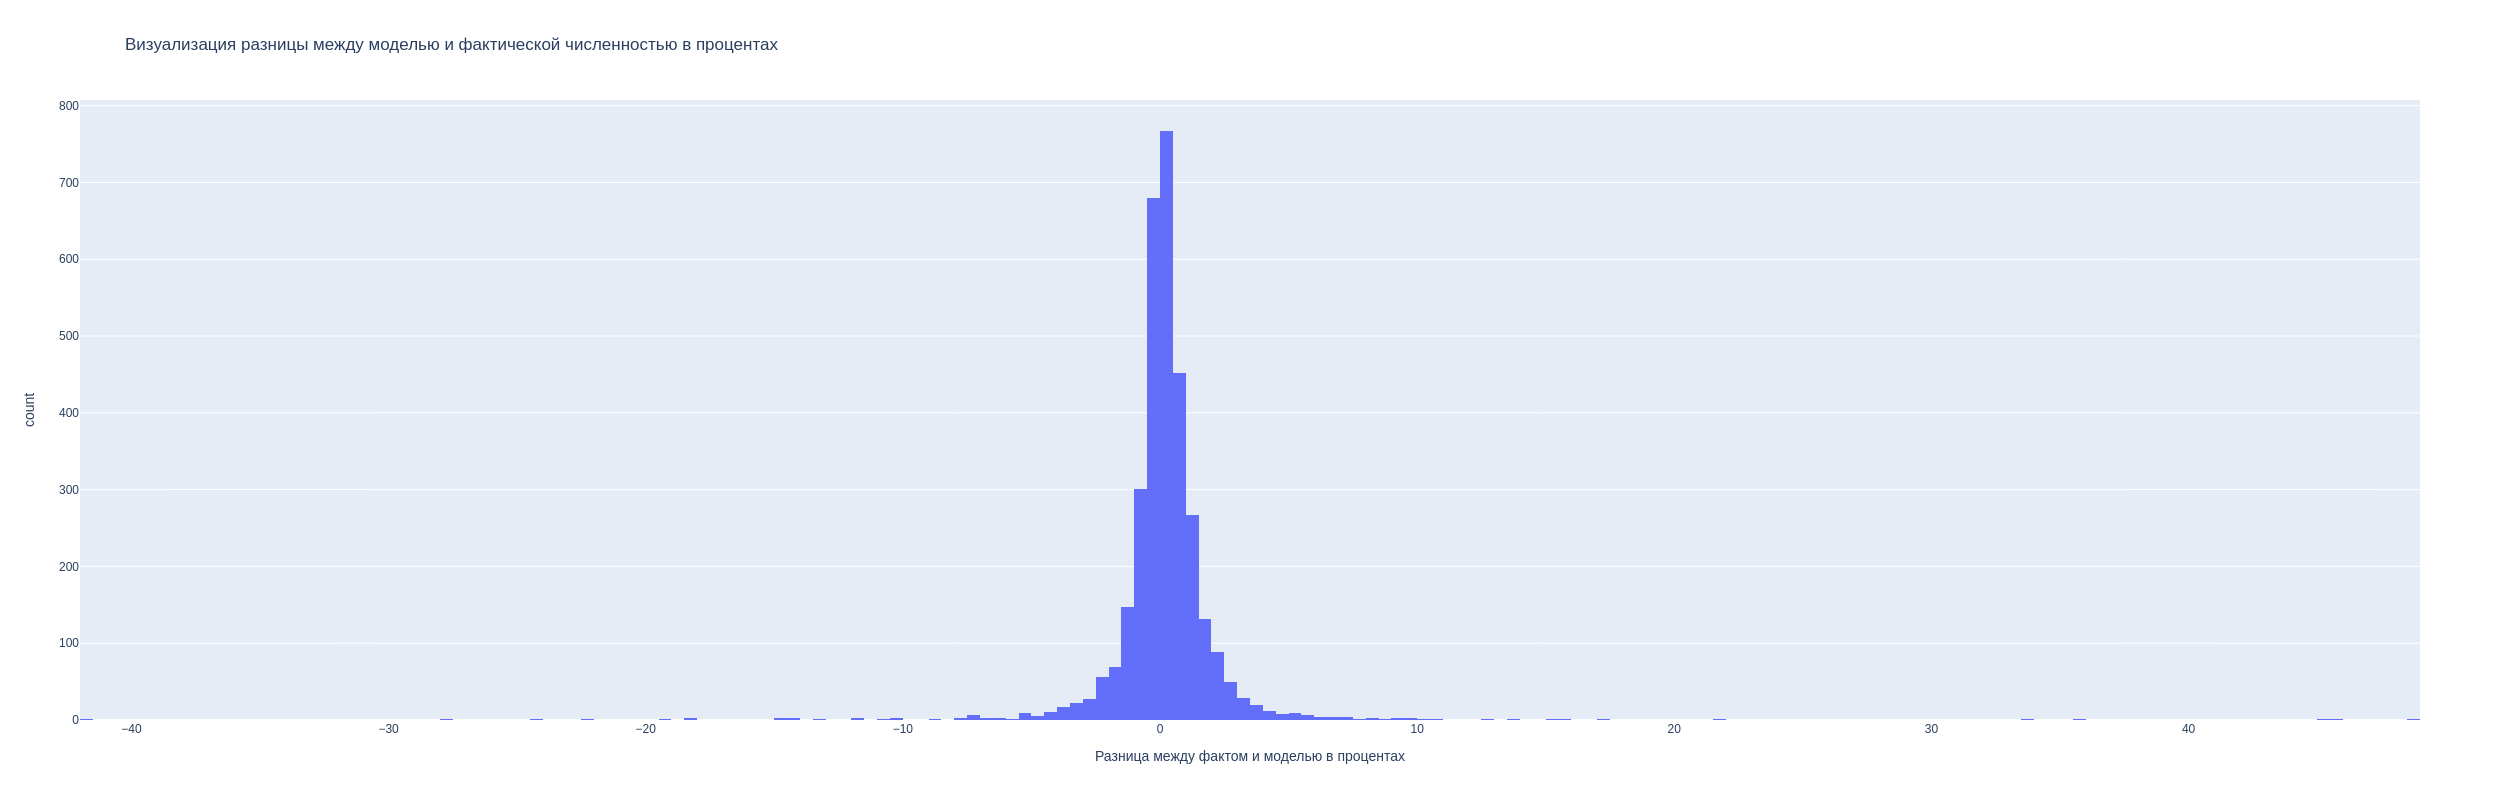

In [37]:
fig = px.histogram(df_model_analysis, x='Разница между фактом и моделью в процентах', nbins=250, title = 'Визуализация разницы между моделью и фактической численностью в процентах', width=2500, height=800)
fig.show('png')

**Видим, что в распределении присутсуют достаточно большие выбросы, при этом их количество составляет 317 единиц, из 3250 значений в датафрейме, для которых присутсвует фактическое значение населения в городе. Что составляет 9,75% процентов от всего количества, видим, что впроцентах количество выбросов падает в 2 раза. На мой взгляд правильнее оценивать точность модели относительно процентной разницы**

In [38]:
from scipy.stats import kstest

#perform Kolmogorov-Smirnov test
kstest(df_model_analysis['Разница между фактом и моделью в процентах'].dropna(), 'norm')

KstestResult(statistic=0.10256335211952988, pvalue=3.2252033258977306e-30)

**После теста Колмогорова-Смирнова, можем утвержать, что данные пришли к нам не из нормального распределения, в данных также присутсвуют большие выбросы.**

In [39]:
minimum_percent = -0.391291 - 1.5*(0.806452 - (-0.391291))
maximum_percent  = 0.806452 + 1.5*(0.806452 - (-0.391291))
print('Границы, за которыми значения являются выбросами:', '\n', 'Минимум:', minimum_percent, '\n','Максимум:', maximum_percent)
df_without_emissions_percent  = df_model_analysis[df_model_analysis['Разница между фактом и моделью в процентах'] > minimum_percent]
df_without_emissions_percent  = df_without_emissions_percent[df_without_emissions_percent['Разница между фактом и моделью в процентах'] < maximum_percent]

Границы, за которыми значения являются выбросами: 
 Минимум: -2.1879055 
 Максимум: 2.6030664999999997


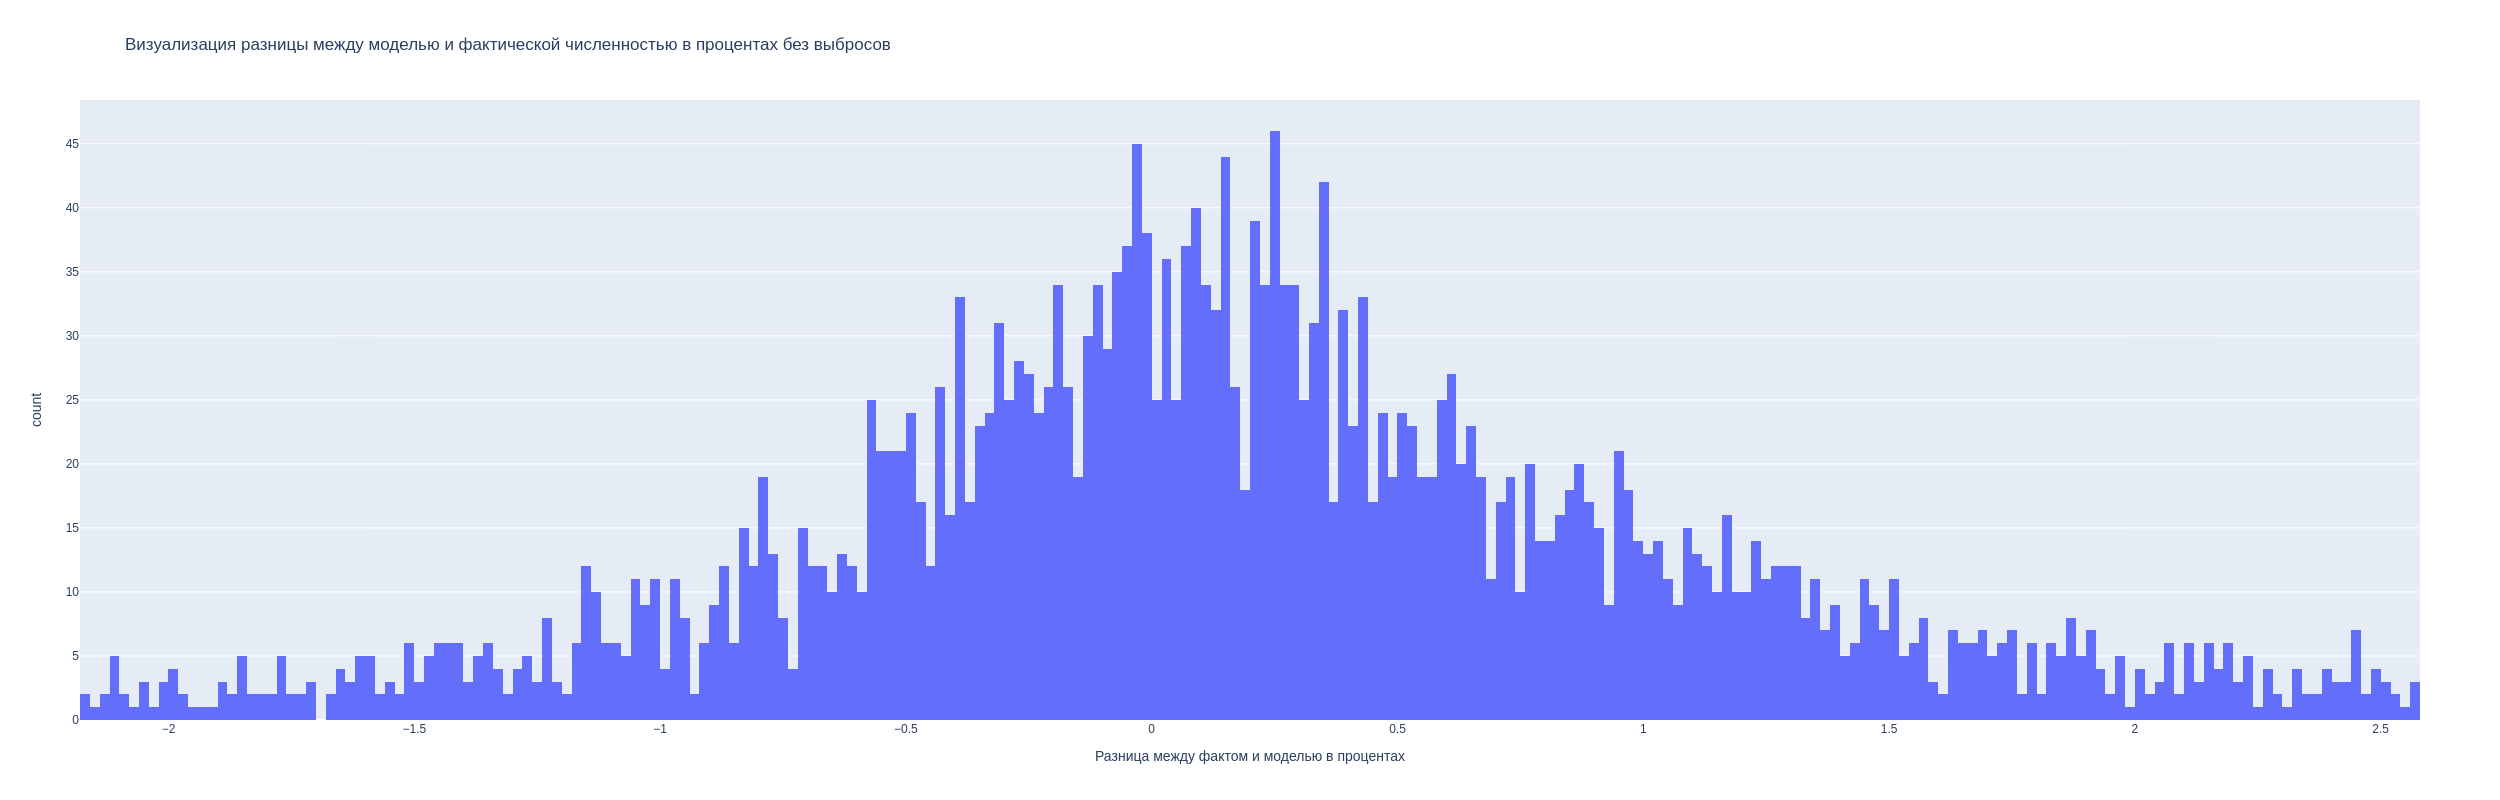

In [40]:
fig = px.histogram(df_without_emissions_percent, x="Разница между фактом и моделью в процентах", nbins=250, title = 'Визуализация разницы между моделью и фактической численностью в процентах без выбросов', width=2500, height=800)
fig.show('png')

**Сверху представлен график разницы между фактом и моделью без учета выбросов, далее проанализируем выбросы.**

In [41]:
df_emissions_minus_percent = df_model_analysis[df_model_analysis['Разница между фактом и моделью в процентах'] < minimum_percent]
df_emissions_plus_percent = df_model_analysis[df_model_analysis['Разница между фактом и моделью в процентах'] > maximum_percent]

df_emissions_minus_percent.sort_values(by='Разница между фактом и моделью в процентах')

,Город,year,fact,Модель,Нижняя граница,Верхняя граница,Разница между фактом и моделью,Разница между фактом и моделью в процентах
29423,Гудермес,2020,56521.0,32900.0,14300.0,75500.0,-23621.0,-41.791547
29422,Гудермес,2019,54910.0,39700.0,19200.0,82400.0,-15210.0,-27.699873
9455,Магас,2017,8295.0,6300.0,5300.0,7600.0,-1995.0,-24.050633
29411,Гудермес,2008,48360.0,37700.0,17600.0,80700.0,-10660.0,-22.043011
7876,Плес,2011,3599.0,2900.0,2600.0,3200.0,-699.0,-19.422062
...,...,...,...,...,...,...,...,...
2314,Бирюч,2015,7465.0,7300.0,7300.0,7400.0,-165.0,-2.210315
987,Ессентуки,2019,111768.0,109300.0,108700.0,109900.0,-2468.0,-2.208145
30024,Якутск,2016,322623.0,315500.0,314900.0,316200.0,-7123.0,-2.207840
258,Краснодар,2016,958390.0,937400.0,921600.0,953400.0,-20990.0,-2.190131


In [42]:
df_emissions_plus_percent.sort_values(by='Разница между фактом и моделью в процентах',ascending=False)

,Город,year,fact,Модель,Нижняя граница,Верхняя граница,Разница между фактом и моделью,Разница между фактом и моделью в процентах
29416,Гудермес,2013,49205.0,73300.0,46300.0,116200.0,24095.0,48.968601
29415,Гудермес,2012,48360.0,70600.0,43900.0,113500.0,22240.0,45.988420
29417,Гудермес,2014,50051.0,72600.0,45700.0,115500.0,22549.0,45.052047
29418,Гудермес,2015,50896.0,69000.0,42600.0,111800.0,18104.0,35.570575
29414,Гудермес,2011,48360.0,64600.0,38800.0,107500.0,16240.0,33.581472
...,...,...,...,...,...,...,...,...
1706,Райчихинск,2012,21435.0,22000.0,21800.0,22200.0,565.0,2.635876
3286,Петушки,2019,12667.0,13000.0,12700.0,13300.0,333.0,2.628878
7639,Заволжск,2016,10524.0,10800.0,10500.0,11100.0,276.0,2.622577
1827,Шимановск,2012,19490.0,20000.0,19800.0,20100.0,510.0,2.616727


In [43]:
pd.set_option('display.max_rows',25)
df_emissions_minus_percent['Город'].value_counts().head(25)

Коломна           6
Анапа             6
Магас             6
Назрань           6
Карабулак         6
Михайловка        6
Гудермес          5
Сортавала         5
Каспийск          5
Среднеуральск     5
Краснодар         4
Анадырь           4
Соликамск         4
Наволоки          4
Кизилюрт          4
Саяногорск        4
Плес              4
Облучье           4
Гаврилов Посад    3
Покров            3
Якутск            3
Ладушкин          3
Ялуторовск        3
Семилуки          3
Карачаевск        3
Name: Город, dtype: int64

In [44]:
df_emissions_plus_percent['Город'].value_counts().head(25)

Гудермес                     8
Магас                        6
Плес                         6
Пучеж                        5
Александровск-Сахалинский    5
Саяногорск                   5
Воркута                      5
Инта                         4
Коломна                      4
Агидель                      4
Сортавала                    4
Усть-Илимск                  4
Наволоки                     4
Заволжск                     4
 Оха                         4
Красавино                    4
Михайловка                   4
Камбарка                     4
Гаврилов Посад               3
Соликамск                    3
Райчихинск                   3
Муравленко                   3
Шимановск                    3
Дмитриев                     3
Николаевск-на-Амуре          3
Name: Город, dtype: int64

**Видно, что в процентном соотношении модель почти не ошибается на больших городах, при этом допуская ошибки на маленьких**

**Ниже рассмотрим, как часто фактическое значение жителей городов попадает в предсказанный интервал (от нижней до верхней границы)**

In [45]:
df_model_analysis_range = df_model_analysis[df_model_analysis.fact.notna()]
in_range = len(df_model_analysis_range.loc[(df['fact'] >= df['Нижняя граница']) & (df['fact'] <= df['Верхняя граница'])])
df_graph = pd.DataFrame({'Вхождение в диапазон': ['Входит', 'Не входит'], 'Количество': [in_range,len(df_model_analysis_range)-in_range]})
df_graph

,Вхождение в диапазон,Количество
0,Входит,1995
1,Не входит,1255


In [46]:
print('Входит в диапазон в проценте от всех значений:', round(in_range/len(df_model_analysis_range)*100,2), '%')
print('Не входит в диапазон в проценте от всех значений:', round((len(df_model_analysis_range)-in_range)/len(df_model_analysis_range)*100,2), '%')

Входит в диапазон в проценте от всех значений: 61.38 %
Не входит в диапазон в проценте от всех значений: 38.62 %


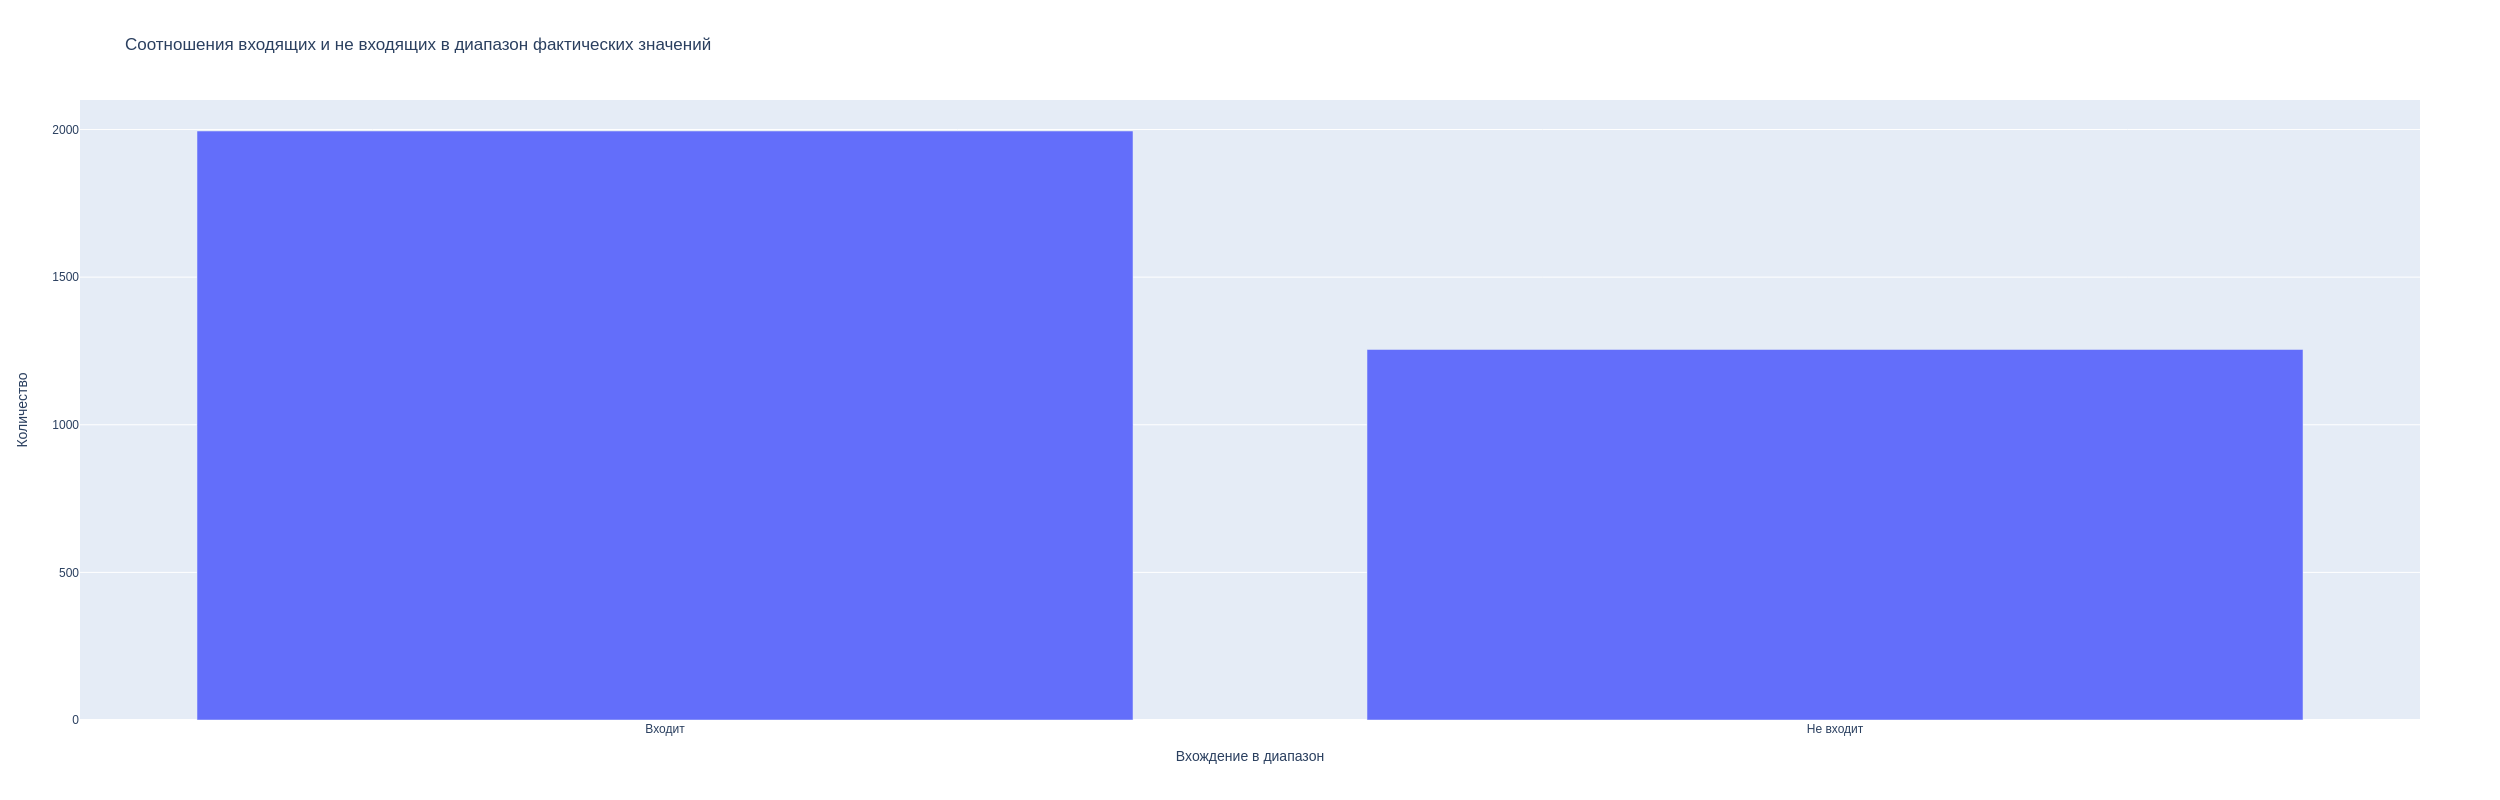

In [47]:
fig = px.bar(df_graph, x='Вхождение в диапазон', y='Количество', title="Соотношения входящих и не входящих в диапазон фактических значений", width=2500, height=800)
fig.show('png')

**Видим, что на фактических значениях данные не входят в диапазон в 38.62% процентов случаев, что очень много для предскзательной модели.**

# **Рассмотрение изменения фактической численности жителей, в промежутках по 4 года(2008-2012, 2012-2016, 2016-2020).**

**Рассмотрим, в каком количестве городов количество жителей увеличилось/уменьшилось и список этих городов.** 

**Рассматривать будем на отрезках в 4 года, так как брать отрезки меньшей длины не показательно, потому что тенденции проявляются на более длинных отрезках, в том числе в планировании оптимальные горизонты около 5 лет.**

## **2008-2012 год**

In [48]:
df_model_analysis_2008_2020 = df[df.fact.notna()]
df_model_analysis_2008_2020 = df_model_analysis_2008_2020.loc[df_model_analysis_2008_2020['year'].isin([2008, 2012, 2016, 2020])].reset_index()
df_model_analysis_2008_2020

,index,Город,year,fact,Модель,Нижняя граница,Верхняя граница,Разница между фактом и моделью,Разница между фактом и моделью в процентах
0,8,Белокуриха,2008,14781.0,14900.0,14600.0,15200.0,119.0,0.805088
1,12,Белокуриха,2012,14375.0,14700.0,14400.0,15000.0,325.0,2.260870
2,16,Белокуриха,2016,15168.0,14800.0,14500.0,15100.0,-368.0,-2.426160
3,20,Белокуриха,2020,15176.0,15100.0,14800.0,15500.0,-76.0,-0.500791
4,129,Новоалтайск,2008,70454.0,70800.0,69900.0,71700.0,346.0,0.491101
...,...,...,...,...,...,...,...,...,...
995,30028,Якутск,2020,343423.0,337900.0,337700.0,338200.0,-5523.0,-1.608221
996,30137,Облучье,2008,9182.0,8900.0,8500.0,9200.0,-282.0,-3.071226
997,30141,Облучье,2012,8985.0,9600.0,9200.0,9900.0,615.0,6.844741
998,30145,Облучье,2016,9960.0,9800.0,9500.0,10200.0,-160.0,-1.606426


In [49]:
dict_2008_2012 = {}
for i in range(0,len(df_model_analysis_2008_2020)-3, 4):
  key = df_model_analysis_2008_2020['Город'].iloc[i]
  res = df_model_analysis_2008_2020['fact'].iloc[i+1] - df_model_analysis_2008_2020['fact'].iloc[i]
  dict_2008_2012[key] = res

dict_to_list = list(dict_2008_2012.items())
df_2008_2012 = pd.DataFrame(dict_to_list, columns = ['Город', 'Разница кол-ва жителей']).sort_values('Разница кол-ва жителей', ascending = False).reset_index()
df_2008_2012

,index,Город,Разница кол-ва жителей
0,130,Москва,669727.0
1,2,Краснодар,78634.0
2,213,Уфа,49363.0
3,136,Химки,30870.0
4,147,Оренбург,30811.0
...,...,...,...
243,227,Инта,-6148.0
244,150,Новотроицк,-6346.0
245,211,Ярославль,-9450.0
246,77,Усть-Илимск,-11978.0


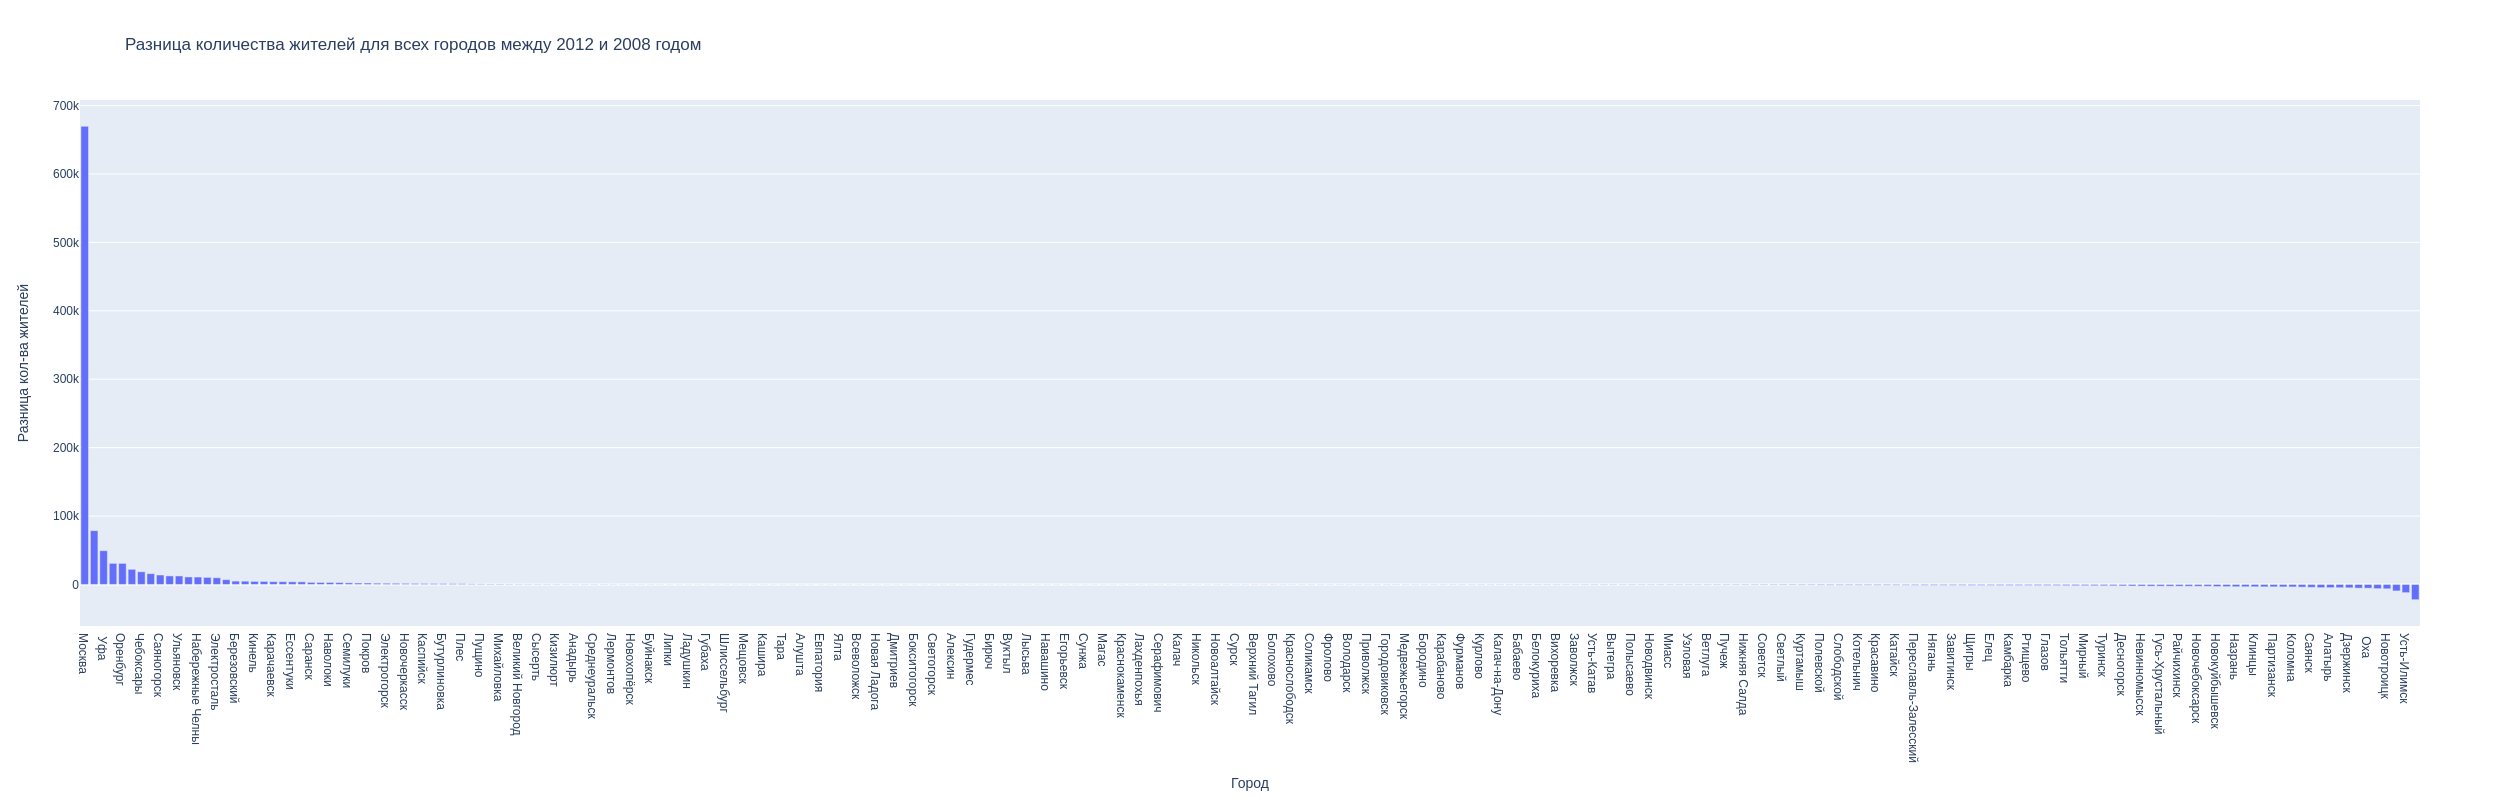

In [50]:
fig = px.bar(df_2008_2012.iloc[:], x='Город',y = 'Разница кол-ва жителей',title = 'Разница количества жителей для всех городов между 2012 и 2008 годом', width=2500, height=800)
fig.show('png') 

**График получился не очень наглядный из-за присутсвия Москвы и других больших городов, удалим несколько городов с большими значениями.**

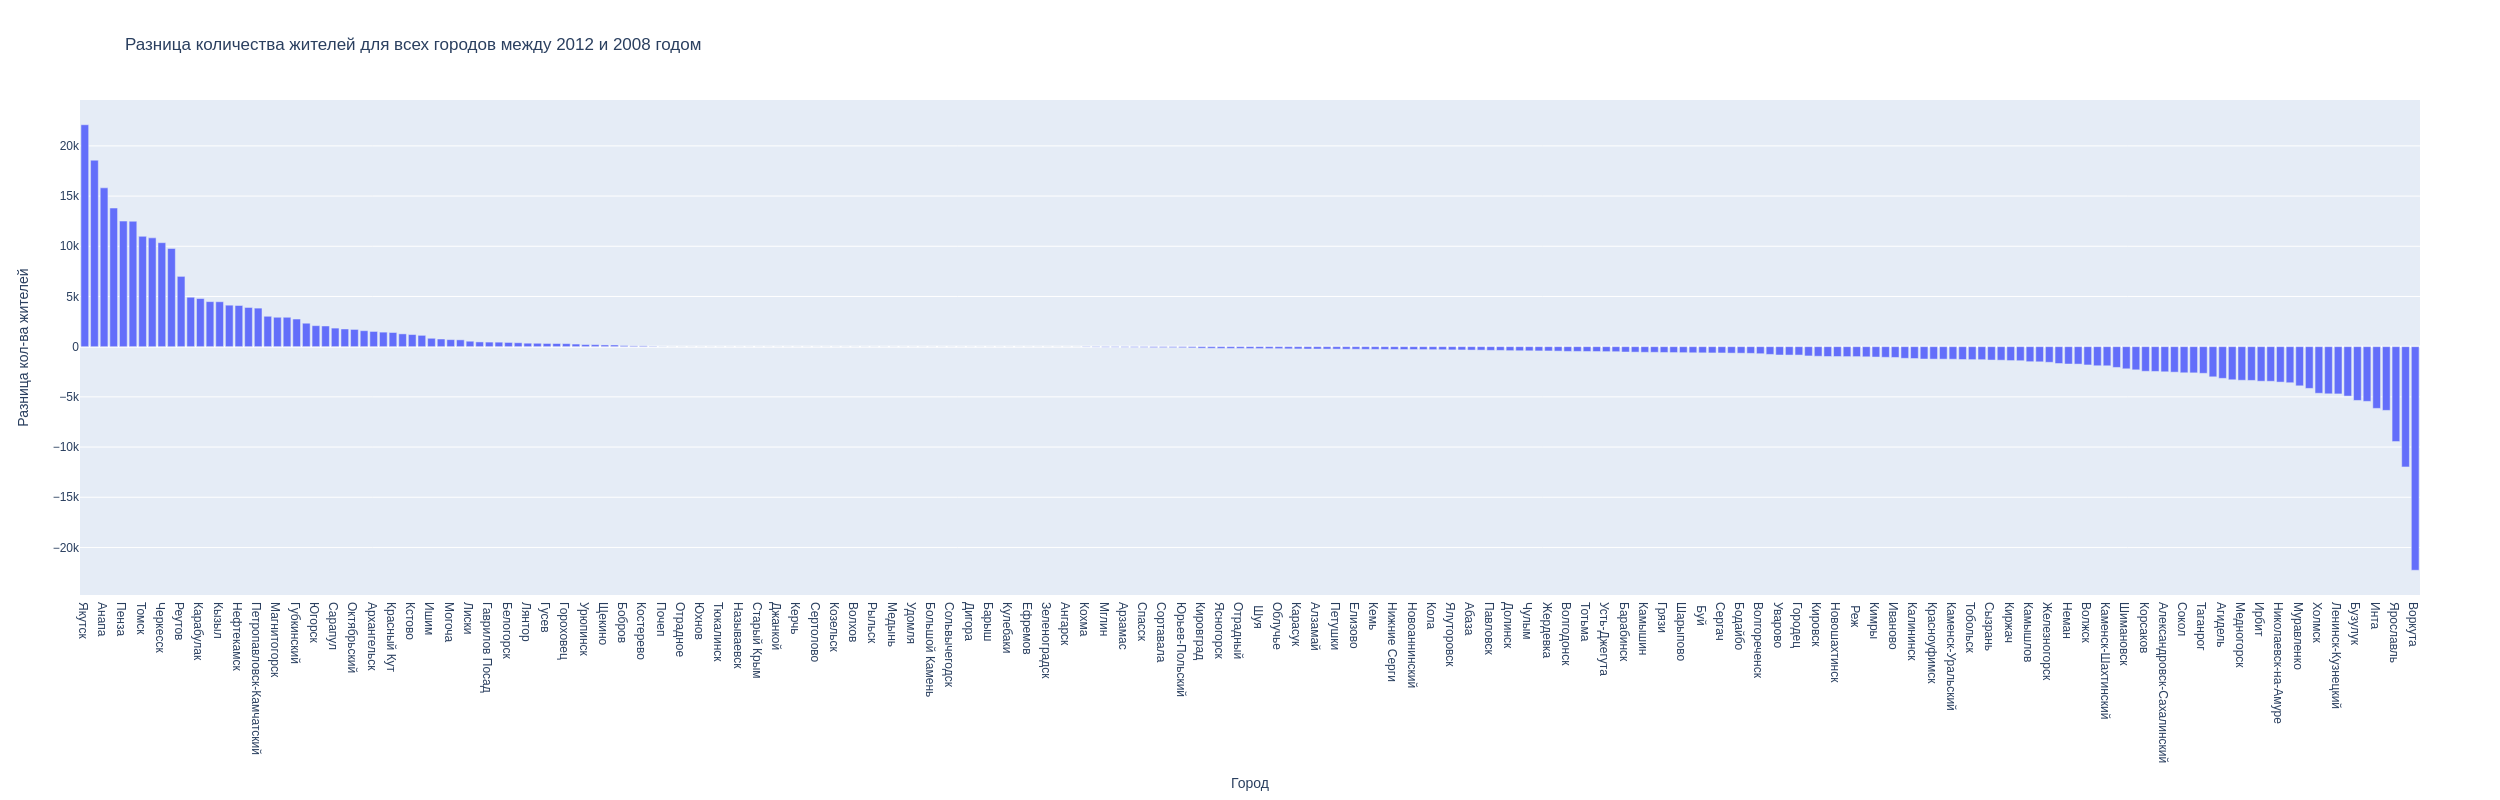

In [51]:
fig = px.bar(df_2008_2012.iloc[5:], x='Город',y = 'Разница кол-ва жителей',title = 'Разница количества жителей для всех городов между 2012 и 2008 годом', width=2500, height=800)
fig.show('png') 

**Срезав 5 городов с самой большой численностью видим более наглядный график.**

**Далее посмотрим на соотношение количества городов, по изменению жителей (положительная/отрицательная/нулевая прибавка).**

In [52]:
increased = len(df_2008_2012.loc[df_2008_2012['Разница кол-ва жителей'] > 0])
unchanged = len(df_2008_2012.loc[df_2008_2012['Разница кол-ва жителей'] == 0])
decreased = len(df_2008_2012.loc[df_2008_2012['Разница кол-ва жителей'] < 0])

df_2008_2012_bar = pd.DataFrame({'Изменение количества жителей': ['Увеличилось', 'Не изменилось', 'Уменьшилось'], 'Количество таких городов': [increased, unchanged, decreased]})
df_2008_2012_bar

,Изменение количества жителей,Количество таких городов
0,Увеличилось,66
1,Не изменилось,43
2,Уменьшилось,139


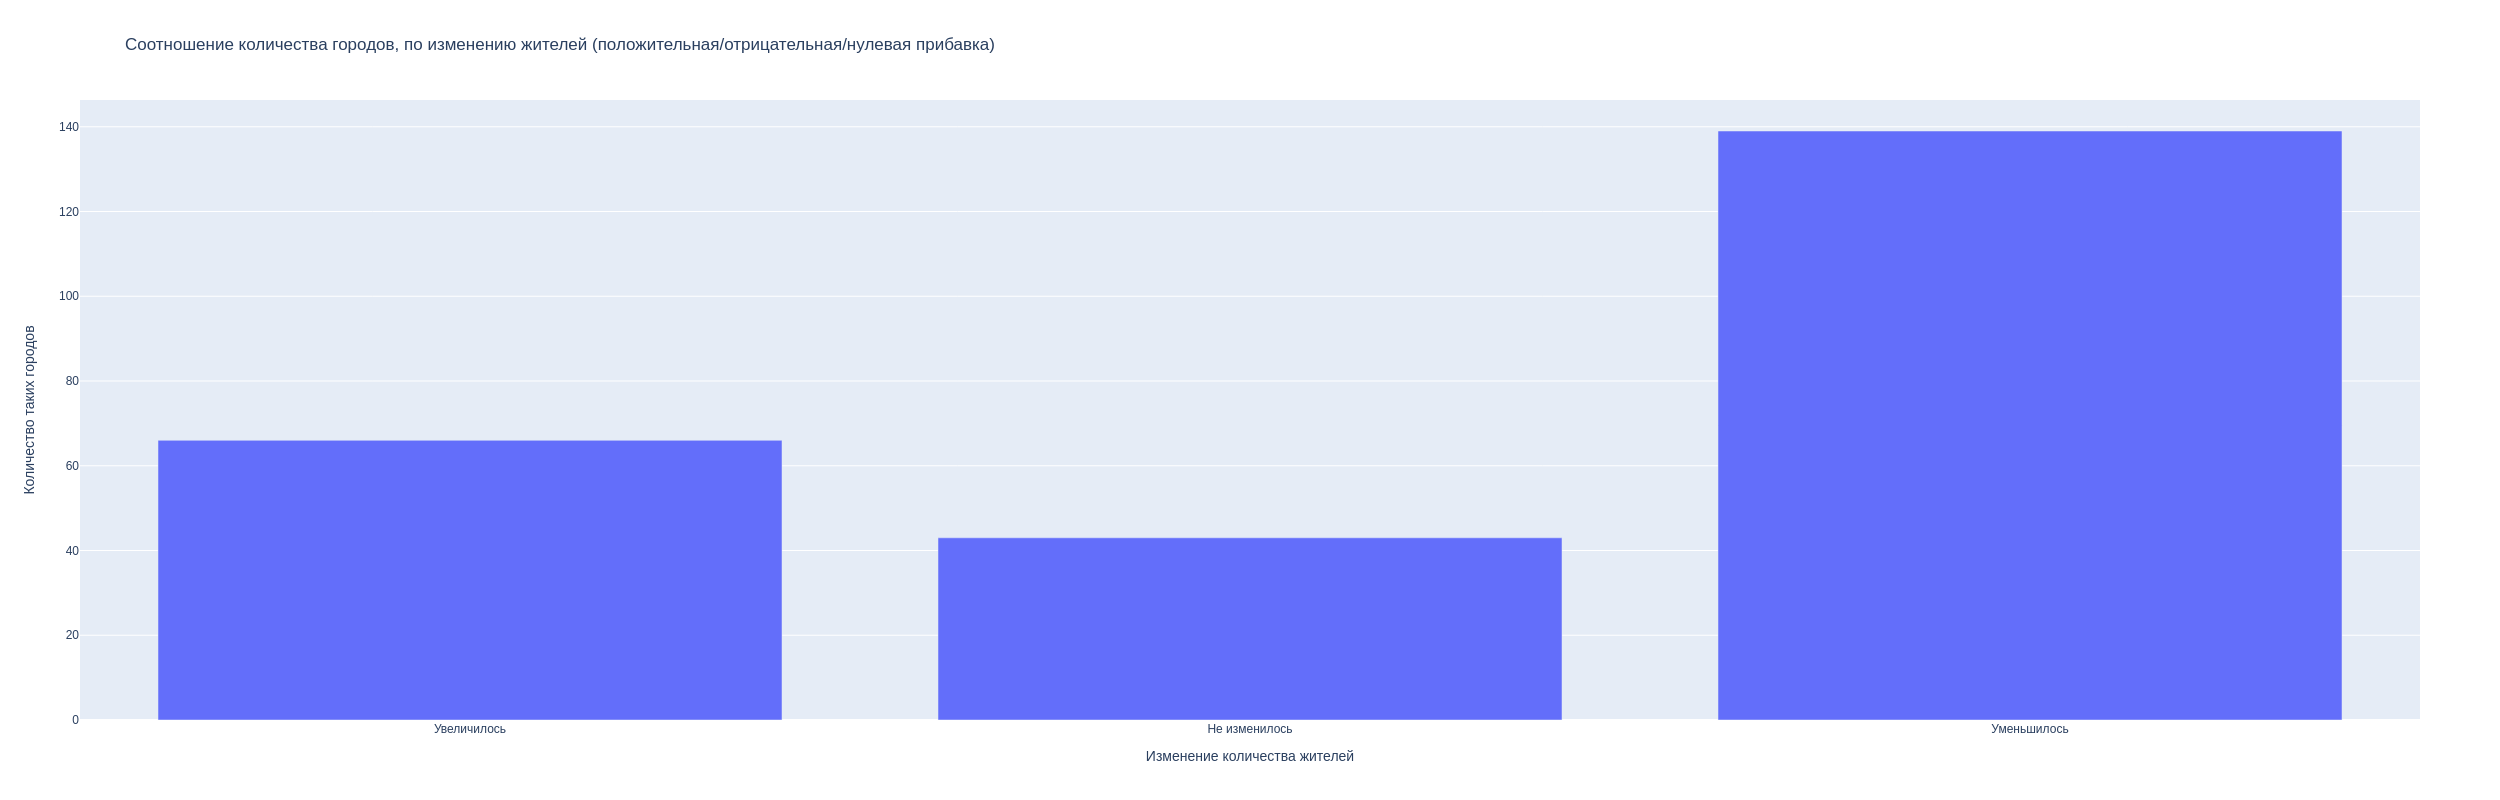

In [53]:
fig = px.bar(df_2008_2012_bar, x="Изменение количества жителей", y="Количество таких городов", title="Соотношение количества городов, по изменению жителей (положительная/отрицательная/нулевая прибавка)", width=2500, height=800)
fig.show('png')

**Видим, что в большинстве городов количество жителей уменьшается, что говорит о том, что люди готовые мигрировать в более крупные города областей, в следствии чего экономика этих городов растет, инфраструктура и качество жизни увеличивается и они привлекают все большее количество людей.**

**Далее посмотрим на 10 городов с самой большой прибавкой и 10 городов с самым большим оттоком.**

In [54]:
print("10 городов с самой большой прибавкой населения", '\n')
df_2008_2012.head(10)

10 городов с самой большой прибавкой населения 



,index,Город,Разница кол-ва жителей
0,130,Москва,669727.0
1,2,Краснодар,78634.0
2,213,Уфа,49363.0
3,136,Химки,30870.0
4,147,Оренбург,30811.0
5,246,Якутск,22105.0
6,242,Чебоксары,18574.0
7,3,Анапа,15822.0
8,240,Саяногорск,13809.0
9,153,Пенза,12510.0


**Достаточно ожидаемо видеть здесь такие крупные города как Москва, Краснодар, Уфа и другие, так например в Уфе в этот период проводилась программа развития Уфы и региона. Это говорит о том, что такие программы увеличивают привлекательность города для населения, также можно предположить, что в связи с плохим климатом на большей части территории страны, популярность приобретают такие южные города как Краснодар и Анапа.**  

In [55]:
print("10 городов с самой большой убылью населения", '\n')
df_2008_2012.tail(10)

10 городов с самой большой убылью населения 



,index,Город,Разница кол-ва жителей
238,243,Алатырь,-4695.0
239,96,Ленинск-Кузнецкий,-4705.0
240,59,Дзержинск,-4921.0
241,148,Бузулук,-5357.0
242,168,Оха,-5447.0
243,227,Инта,-6148.0
244,150,Новотроицк,-6346.0
245,211,Ярославль,-9450.0
246,77,Усть-Илимск,-11978.0
247,225,Воркута,-22270.0


**Среди 10 городов с самой большой убылью на последнем месте видим Воркуту, что не удивительно, так как с исчезновением угледобывающих предприятий, как карточный домик, начала рушиться вся инфраструктура, люди стали терять работу.** 

**По данным на 2022 : За последние 30 лет Воркута лишилась около 70% жителей. По официальным данным, сейчас здесь проживают порядка 50 тысяч человек, но местные уверяют: цифра сильно завышена.**

**Рассмотрим сколько человек в процентном соотношении потеряла Воркута с 2008 по 2012 год.**

In [56]:
vorkuta = df_model_analysis_2008_2020.loc[(df_model_analysis_2008_2020['Город'] == 'Воркута') & (df_model_analysis_2008_2020['year'] == 2008)].fact[904]
vorkuta_minus = df_2008_2012['Разница кол-ва жителей'].tail(1)[247]
print('Процент убыли населения Воркуты:', round((vorkuta_minus*100)/vorkuta,2), '%')

Процент убыли населения Воркуты: -19.89 %


**Видно, что Воркута за 4 года потеряла около 20% жителей, что очень много.**

## **2012-2016 год**

In [57]:
dict_2012_2016 = {}
for i in range(1,len(df_model_analysis_2008_2020)-2, 4):
  key = df_model_analysis_2008_2020['Город'].iloc[i]
  res = df_model_analysis_2008_2020['fact'].iloc[i+1] - df_model_analysis_2008_2020['fact'].iloc[i]
  dict_2012_2016[key] = res

dict_to_list = list(dict_2012_2016.items())
df_2012_2016 = pd.DataFrame(dict_to_list, columns = ['Город', 'Разница кол-ва жителей']).sort_values('Разница кол-ва жителей', ascending = False).reset_index()
df_2012_2016

,index,Город,Разница кол-ва жителей
0,130,Москва,473548.0
1,2,Краснодар,97209.0
2,213,Уфа,39343.0
3,187,Томск,27372.0
4,3,Анапа,27235.0
...,...,...,...
243,36,Камышин,-5216.0
244,59,Дзержинск,-5913.0
245,150,Новотроицк,-7022.0
246,112,Тольятти,-7779.0


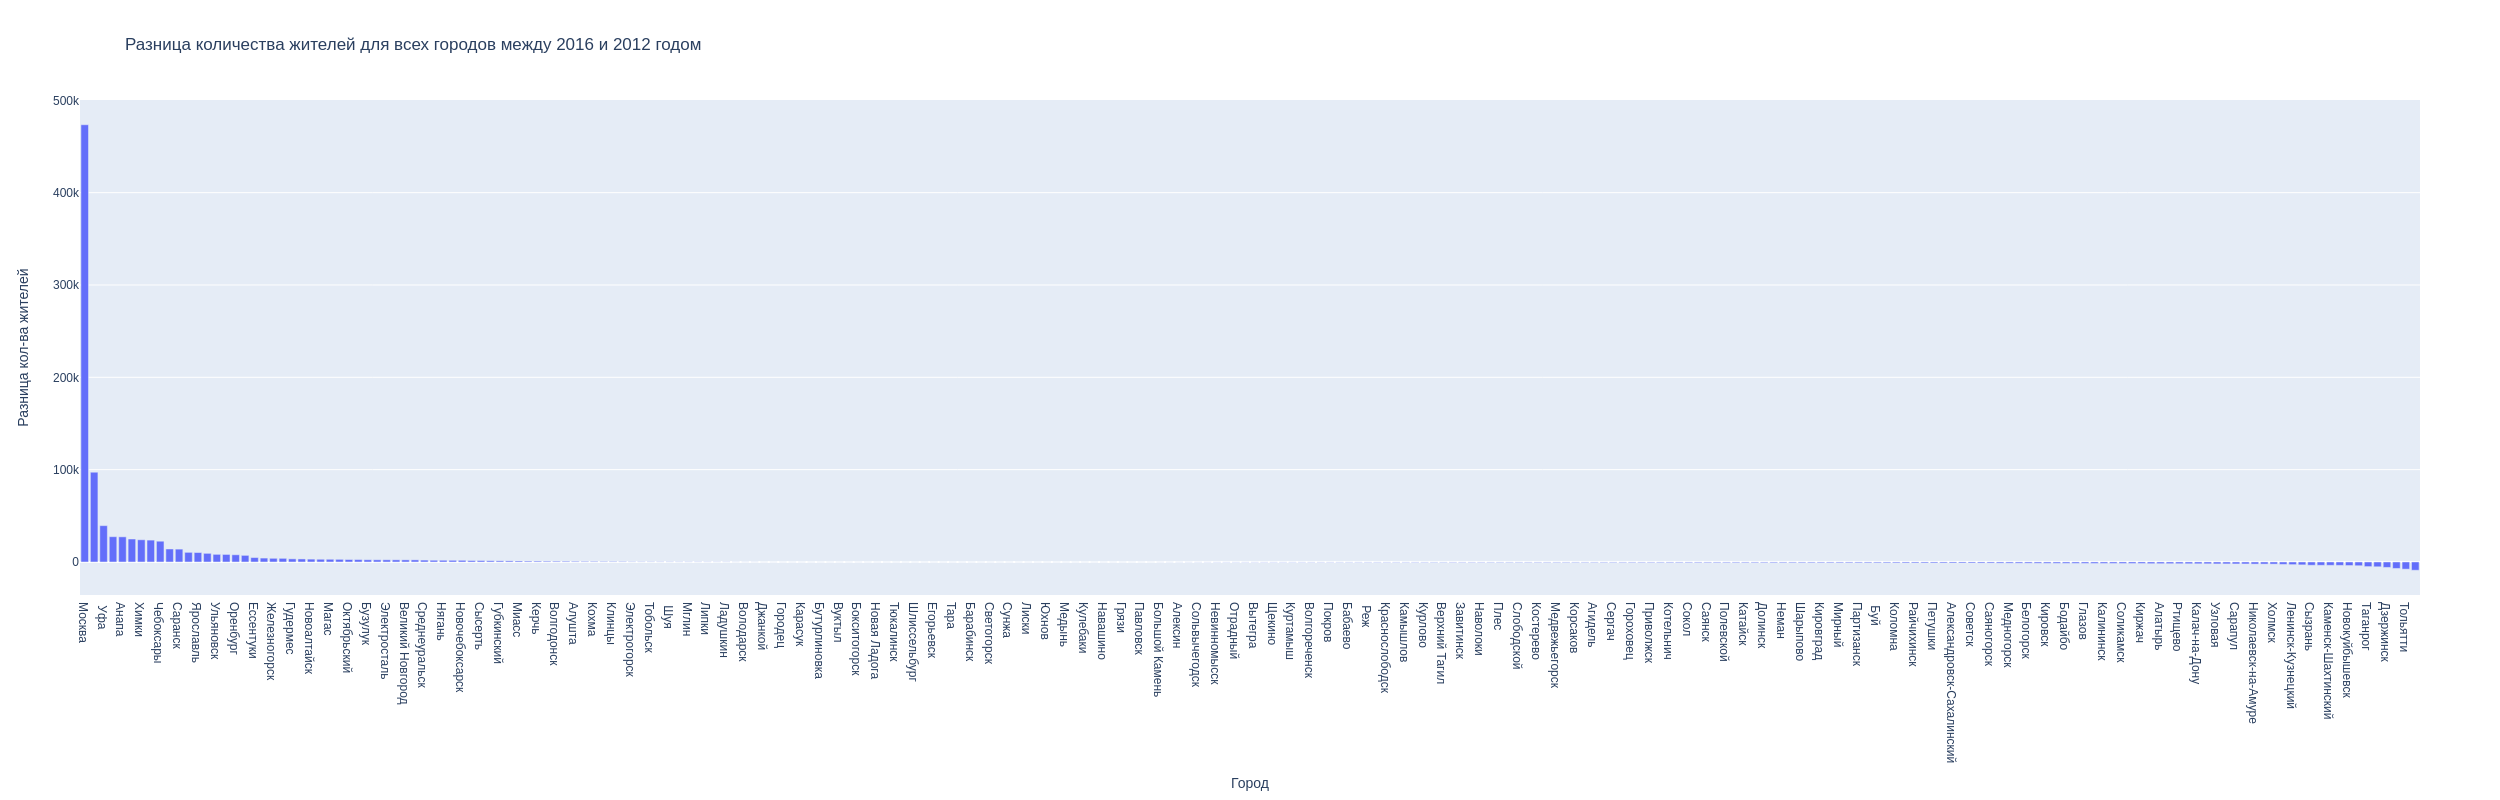

In [58]:
fig = px.bar(df_2012_2016.iloc[:], x='Город',y = 'Разница кол-ва жителей',title = 'Разница количества жителей для всех городов между 2016 и 2012 годом', width=2500, height=800)
fig.show('png') 

**График получился не очень наглядный из-за присутсвия Москвы и других больших городов, удалим несколько городов с большими значениями.**

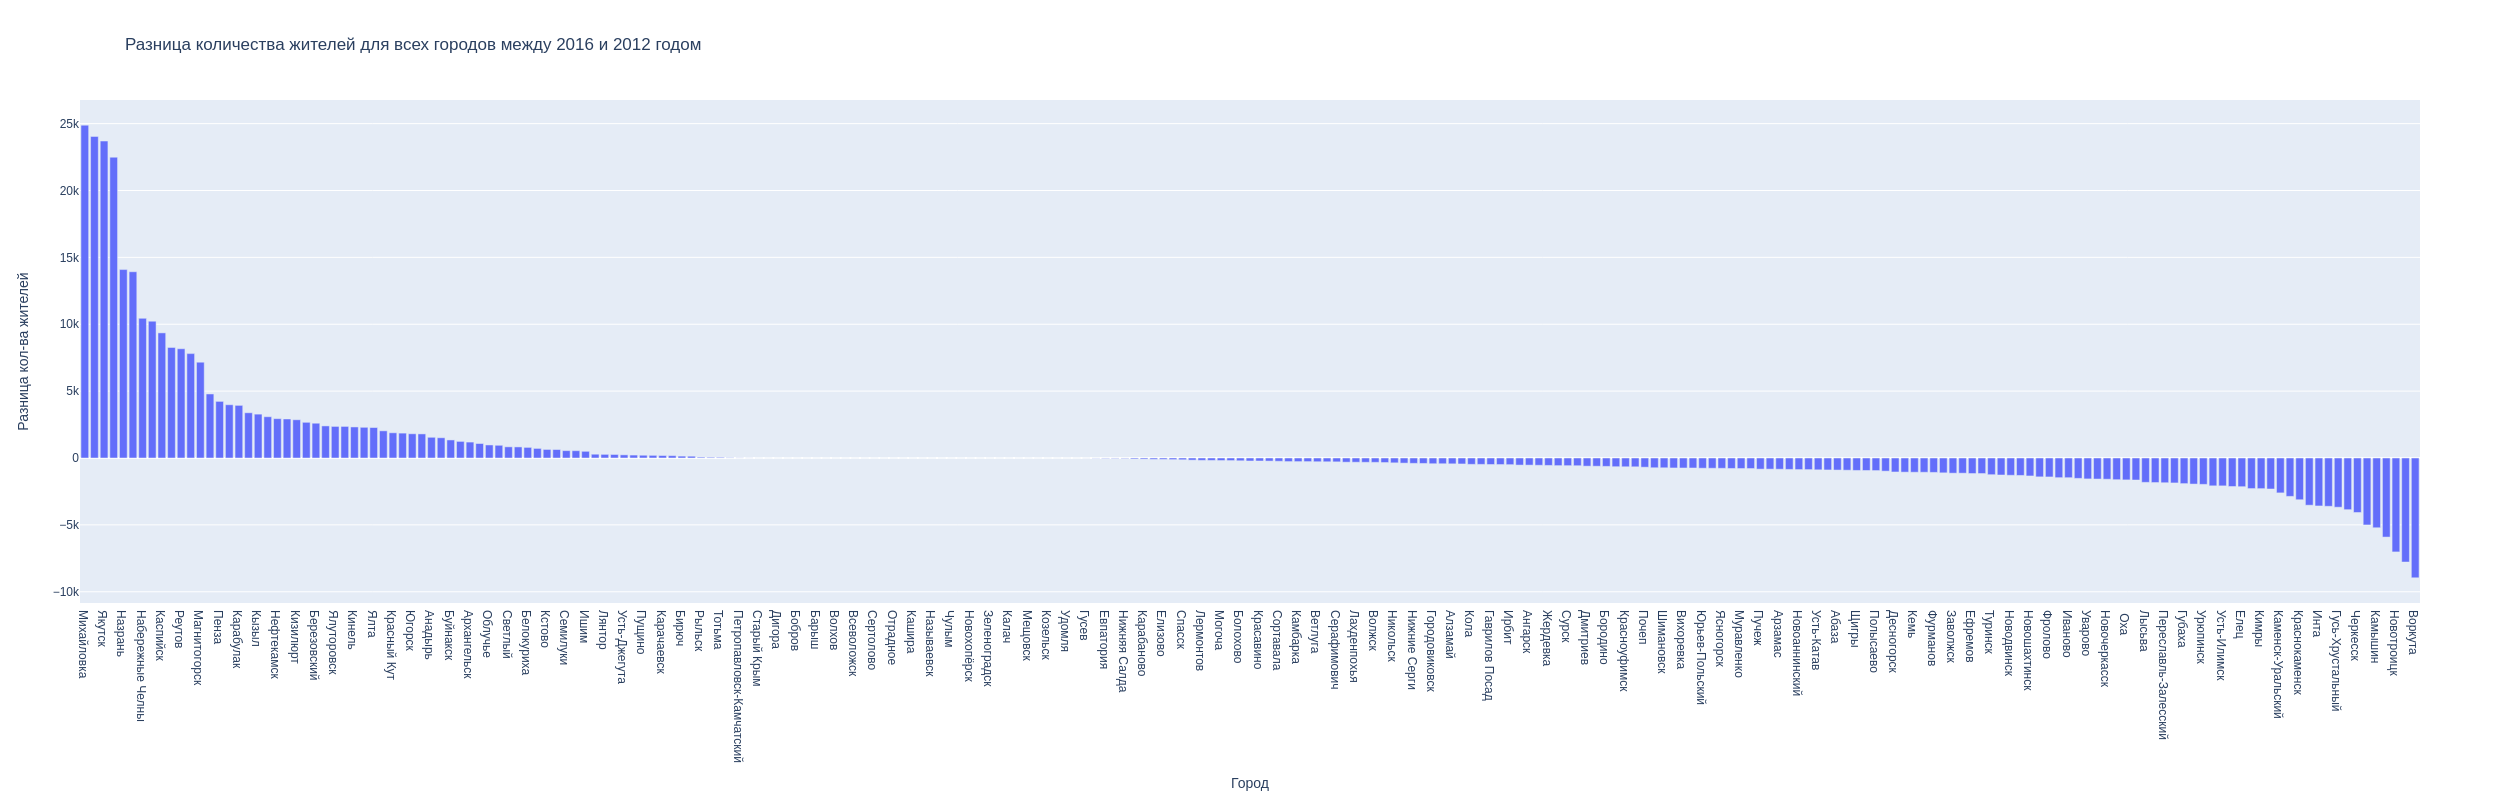

In [59]:
fig = px.bar(df_2012_2016.iloc[5:], x='Город',y = 'Разница кол-ва жителей',title = 'Разница количества жителей для всех городов между 2016 и 2012 годом', width=2500, height=800)
fig.show('png') 

**Срезав 5 городов с самой большой численностью видим более наглядный график.**

**Далее посмотрим на соотношение количества городов, по изменению жителей (положительная/отрицательная/нулевая прибавка).**

In [60]:
increased = len(df_2012_2016.loc[df_2012_2016['Разница кол-ва жителей'] > 0])
unchanged = len(df_2012_2016.loc[df_2012_2016['Разница кол-ва жителей'] == 0])
decreased = len(df_2012_2016.loc[df_2012_2016['Разница кол-ва жителей'] < 0])

df_2012_2016_bar = pd.DataFrame({'Изменение количества жителей': ['Увеличилось', 'Не изменилось', 'Уменьшилось'], 'Количество таких городов': [increased, unchanged, decreased]})
df_2012_2016_bar

,Изменение количества жителей,Количество таких городов
0,Увеличилось,75
1,Не изменилось,34
2,Уменьшилось,139


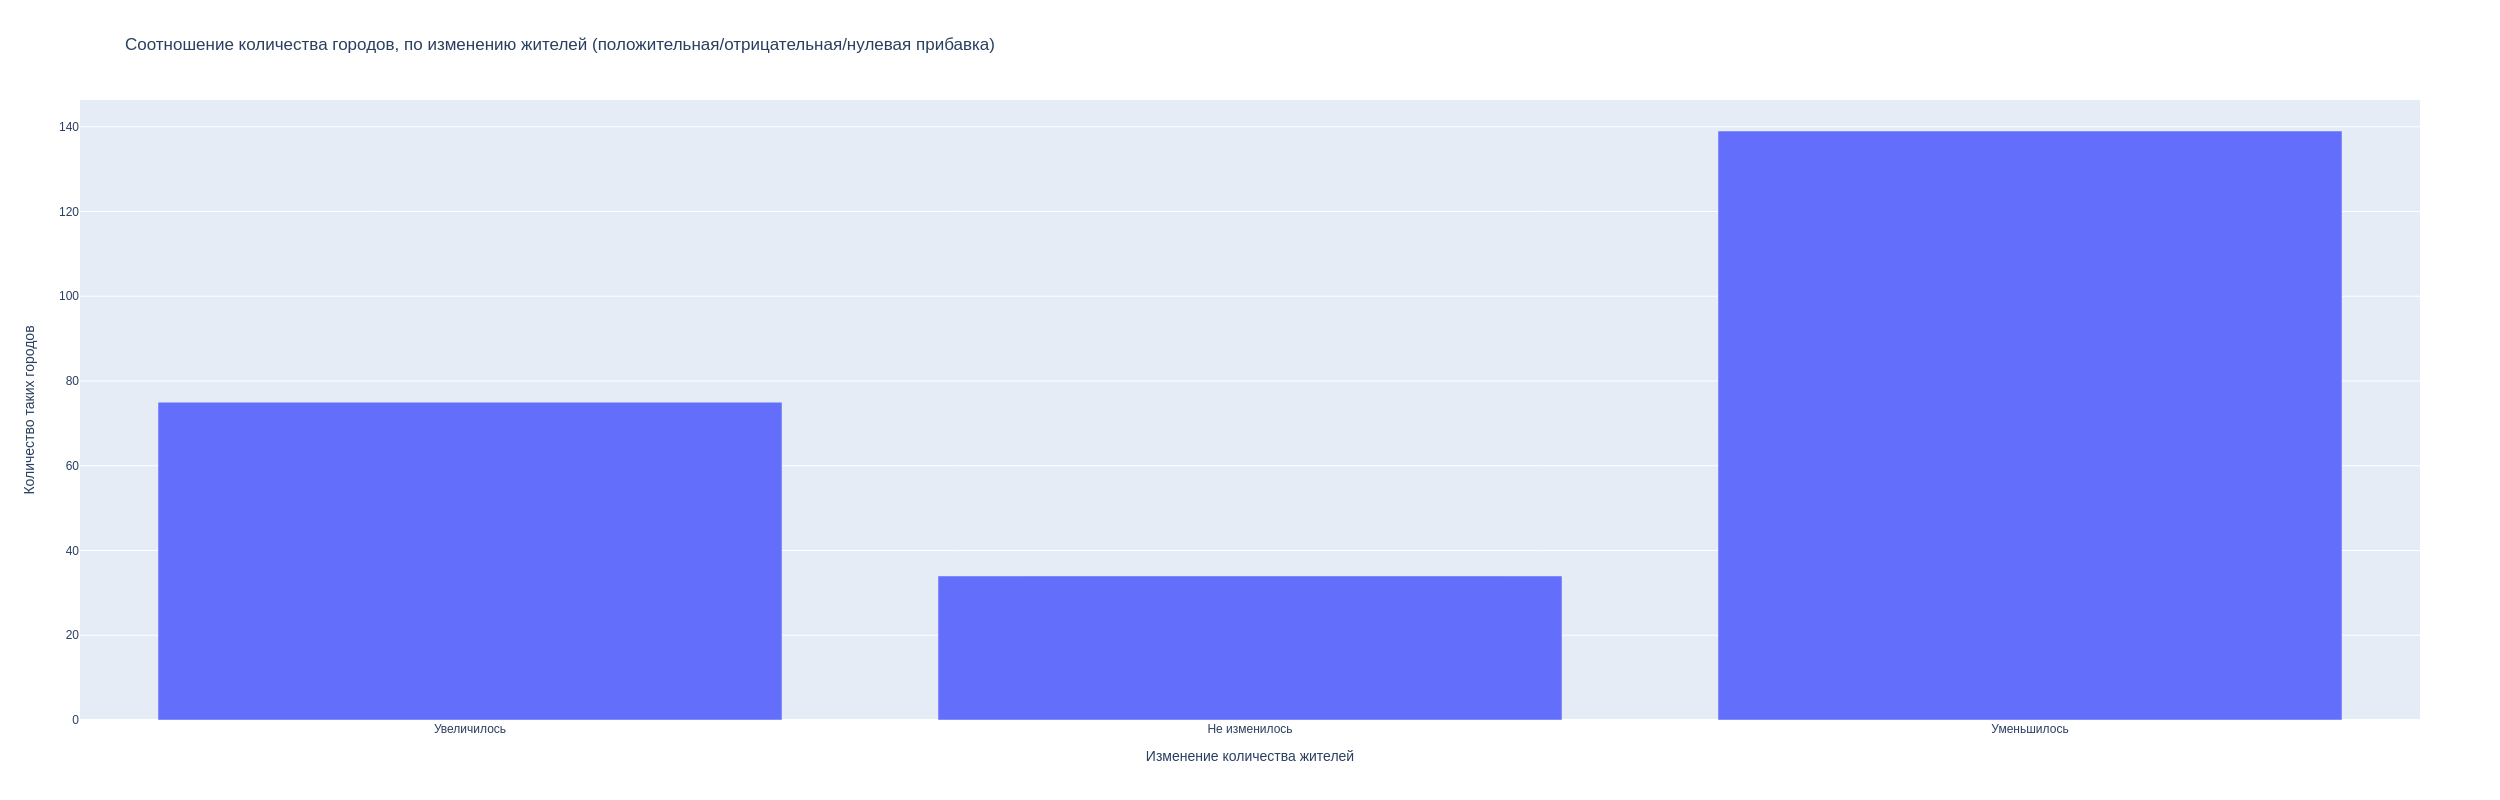

In [61]:
fig = px.bar(df_2012_2016_bar, x="Изменение количества жителей", y="Количество таких городов", title="Соотношение количества городов, по изменению жителей (положительная/отрицательная/нулевая прибавка)", width=2500, height=800)
fig.show('png')

**Видим, что количество городов, в которых количество жителей увеличилось возросло до 75, при это количество городов количество которых уменьшилось не изменилось.**

**Сравним множества городов и найдем какое количество городов осталось в тех же категориях(Увеличилось,Не изменилось,Уменьшилось).**

In [62]:
set_of_increased_2012_2016 = set(df_2012_2016.loc[df_2012_2016['Разница кол-ва жителей'] > 0]['Город'].values)
set_of_unchanged_2012_2016 = set(df_2012_2016.loc[df_2012_2016['Разница кол-ва жителей'] == 0]['Город'].values)
set_of_decreased_2012_2016 = set(df_2012_2016.loc[df_2012_2016['Разница кол-ва жителей'] < 0]['Город'].values)


set_of_increased_2008_2012 = set(df_2008_2012.loc[df_2008_2012['Разница кол-ва жителей'] > 0]['Город'].values)
set_of_unchanged_2008_2012 = set(df_2008_2012.loc[df_2008_2012['Разница кол-ва жителей'] == 0]['Город'].values)
set_of_decreased_2008_2012 = set(df_2008_2012.loc[df_2008_2012['Разница кол-ва жителей'] < 0]['Город'].values)


In [63]:
print('Количество городов, количество жителей которых увеличивалось и в период с 2008 по 2012 ,и в период с 2012 по 2016:', len(set_of_increased_2008_2012 & set_of_increased_2012_2016))
print('Список городов, количество жителей которых увеличивалось и в период с 2008 по 2012 ,и в период с 2012 по 2016:', '\n', set_of_increased_2008_2012 & set_of_increased_2012_2016, '\n', '\n', '\n')

print('Количество городов, количество жителей которых не изменялось и в период с 2008 по 2012 ,и в период с 2012 по 2016:', len(set_of_unchanged_2008_2012 & set_of_unchanged_2012_2016))
print('Список городов, количество жителей которых не изменялось и в период с 2008 по 2012 ,и в период с 2012 по 2016:', '\n', set_of_unchanged_2008_2012 & set_of_unchanged_2012_2016, '\n', '\n', '\n')

print('Количество городов, количество жителей которых уменьшалось и в период с 2008 по 2012 ,и в период с 2012 по 2016:', len(set_of_decreased_2008_2012 & set_of_decreased_2012_2016))
print('Список городов, количество жителей которых уменьшалось и в период с 2008 по 2012 ,и в период с 2012 по 2016:', '\n', set_of_decreased_2008_2012 & set_of_decreased_2012_2016)

Количество городов, количество жителей которых увеличивалось и в период с 2008 по 2012 ,и в период с 2012 по 2016: 45
Список городов, количество жителей которых увеличивалось и в период с 2008 по 2012 ,и в период с 2012 по 2016: 
 {'Реутов', 'Краснодар', 'Ессентуки', 'Якутск', 'Москва', 'Ульяновск', 'Анапа', 'Карабулак', 'Анадырь', 'Карачаевск', 'Липки', 'Кинель', 'Химки', 'Югорск', 'Пущино', 'Кызыл', 'Электрогорск', 'Красный Кут', 'Ладушкин', 'Саранск', 'Среднеуральск', 'Ишим', 'Архангельск', 'Оренбург', 'Октябрьский', ' Уфа', 'Томск', 'Великий Новгород', 'Электросталь', 'Березовский', 'Пенза', 'Нефтекамск', 'Набережные Челны', 'Буйнакск', 'Магнитогорск', 'Сысерть', 'Каспийск', 'Михайловка', 'Семилуки', 'Кстово', 'Кизилюрт', 'Губкинский', 'Чебоксары', 'Петропавловск-Камчатский', 'Лянтор'} 
 
 

Количество городов, количество жителей которых не изменялось и в период с 2008 по 2012 ,и в период с 2012 по 2016: 26
Список городов, количество жителей которых не изменялось и в период с 2008 

**Посмотрев на результаты сравнения промежутков 2008-2012 и 2012-2016, видим, что для большинства городов тенденция изменения количества жителей для большинства городов сохраняется.** 

**Далее посмотрим на 10 городов с самой большой прибавкой и 10 городов с самым большим оттоком.**

In [64]:
print("10 городов с самой большой прибавкой населения", '\n')
df_2012_2016.head(10)

10 городов с самой большой прибавкой населения 



,index,Город,Разница кол-ва жителей
0,130,Москва,473548.0
1,2,Краснодар,97209.0
2,213,Уфа,39343.0
3,187,Томск,27372.0
4,3,Анапа,27235.0
5,37,Михайловка,24886.0
6,136,Химки,24045.0
7,246,Якутск,23697.0
8,242,Чебоксары,22490.0
9,79,Назрань,14088.0


**Видим, что в топ 10 больших изменений с 2008-2012 не произошло, так например ушли такие города как: Оренбург, Саяногорск и Пенза, а прибавились Томск, Михайловка, Назрань. В теории это может быть связано с тем, что в Томске для примера "за рассматриваемый период 2005-2013 основные показатели, характеризующие достижение стратегической цели, среднесрочных целей социально-экономического развития Томской области, показывали устойчивую положительную динамику." (цитата из https://tomsk.gov.ru/ctrategija-sotsialno-ekonomicheskogo-razvitija-tomskoj-oblasti-do-2030-goda)** 

**Видим, что даже несмотря на кризисы Томская область, а в том числе Томск как столица показывали себя как перспективный вариант для людей. В том числе Томск является студенческой столицей России с 2015 года, в связи с чем можно предположить, что в город приехало много студентов за этот период.**

In [65]:
print("10 городов с самой большой убылью населения", '\n')
df_2012_2016.tail(10)

10 городов с самой большой убылью населения 



,index,Город,Разница кол-ва жителей
238,158,Каменск-Шахтинский,-3611.0
239,31,Гусь-Хрустальный,-3681.0
240,109,Новокуйбышевск,-3863.0
241,232,Черкесск,-4076.0
242,161,Таганрог,-5006.0
243,36,Камышин,-5216.0
244,59,Дзержинск,-5913.0
245,150,Новотроицк,-7022.0
246,112,Тольятти,-7779.0
247,225,Воркута,-8961.0


**В составе топ 10 городов с убылью населения в сравнении с 2008-2012 осталось 3 города: Дзержинск, Новотроицк и Воркута(также на последнем месте). В связи с чем можно скзать, что администрации городов(областей) не задумывались о развитии данных город, в связи с чем они так и остались внизу данного списка.**

## **2016-2020 год**

In [66]:
dict_2016_2020 = {}
for i in range(2,len(df_model_analysis_2008_2020)-1, 4):
  key = df_model_analysis_2008_2020['Город'].iloc[i]
  res = df_model_analysis_2008_2020['fact'].iloc[i+1] - df_model_analysis_2008_2020['fact'].iloc[i]
  dict_2016_2020[key] = res

dict_to_list = list(dict_2016_2020.items())
df_2016_2020 = pd.DataFrame(dict_to_list, columns = ['Город', 'Разница кол-ва жителей']).sort_values('Разница кол-ва жителей', ascending = False).reset_index()
df_2016_2020

,index,Город,Разница кол-ва жителей
0,130,Москва,347953.0
1,2,Краснодар,56606.0
2,133,Коломна,40128.0
3,246,Якутск,20800.0
4,3,Анапа,15689.0
...,...,...,...
243,153,Пенза,-5804.0
244,111,Сызрань,-6024.0
245,150,Новотроицк,-6467.0
246,225,Воркута,-7979.0


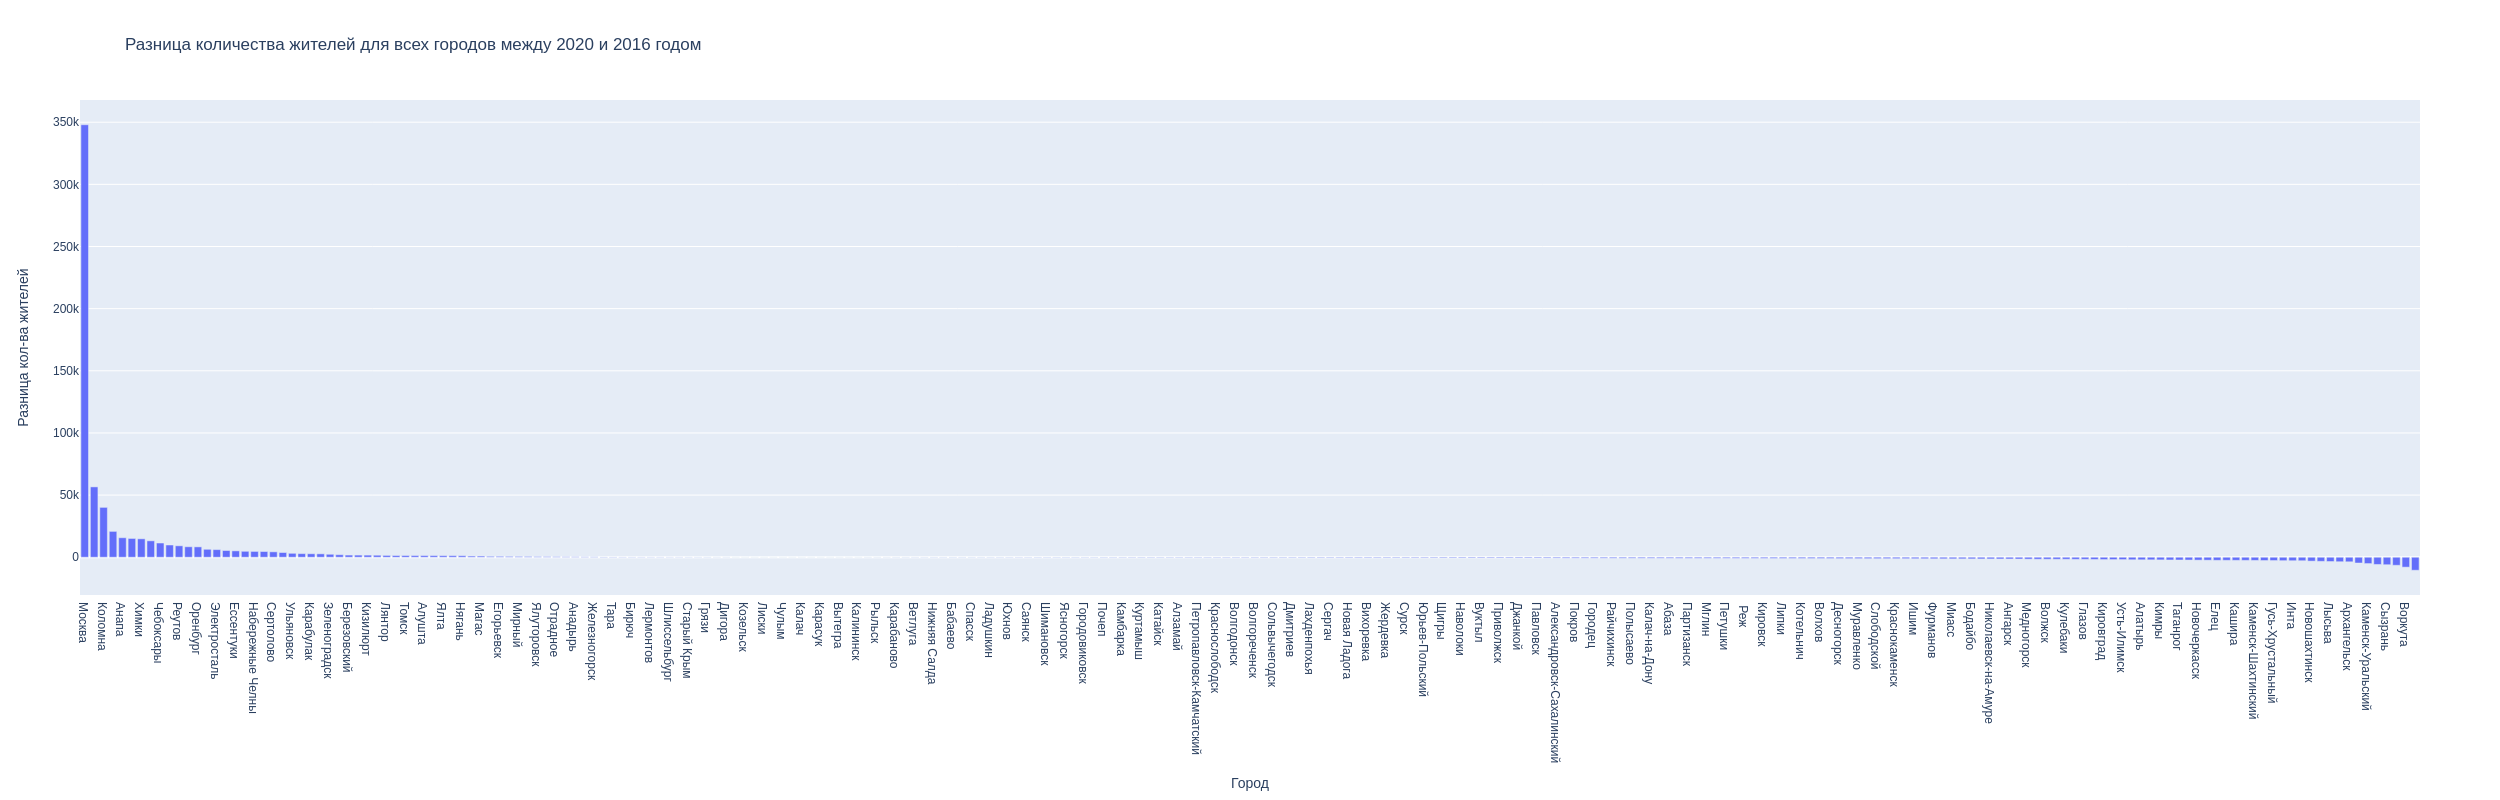

In [67]:
fig = px.bar(df_2016_2020.iloc[:], x='Город',y = 'Разница кол-ва жителей',title = 'Разница количества жителей для всех городов между 2020 и 2016 годом', width=2500, height=800)
fig.show('png') 

**График получился не очень наглядный из-за присутсвия Москвы и других больших городов, удалим несколько городов с большими значениями.**

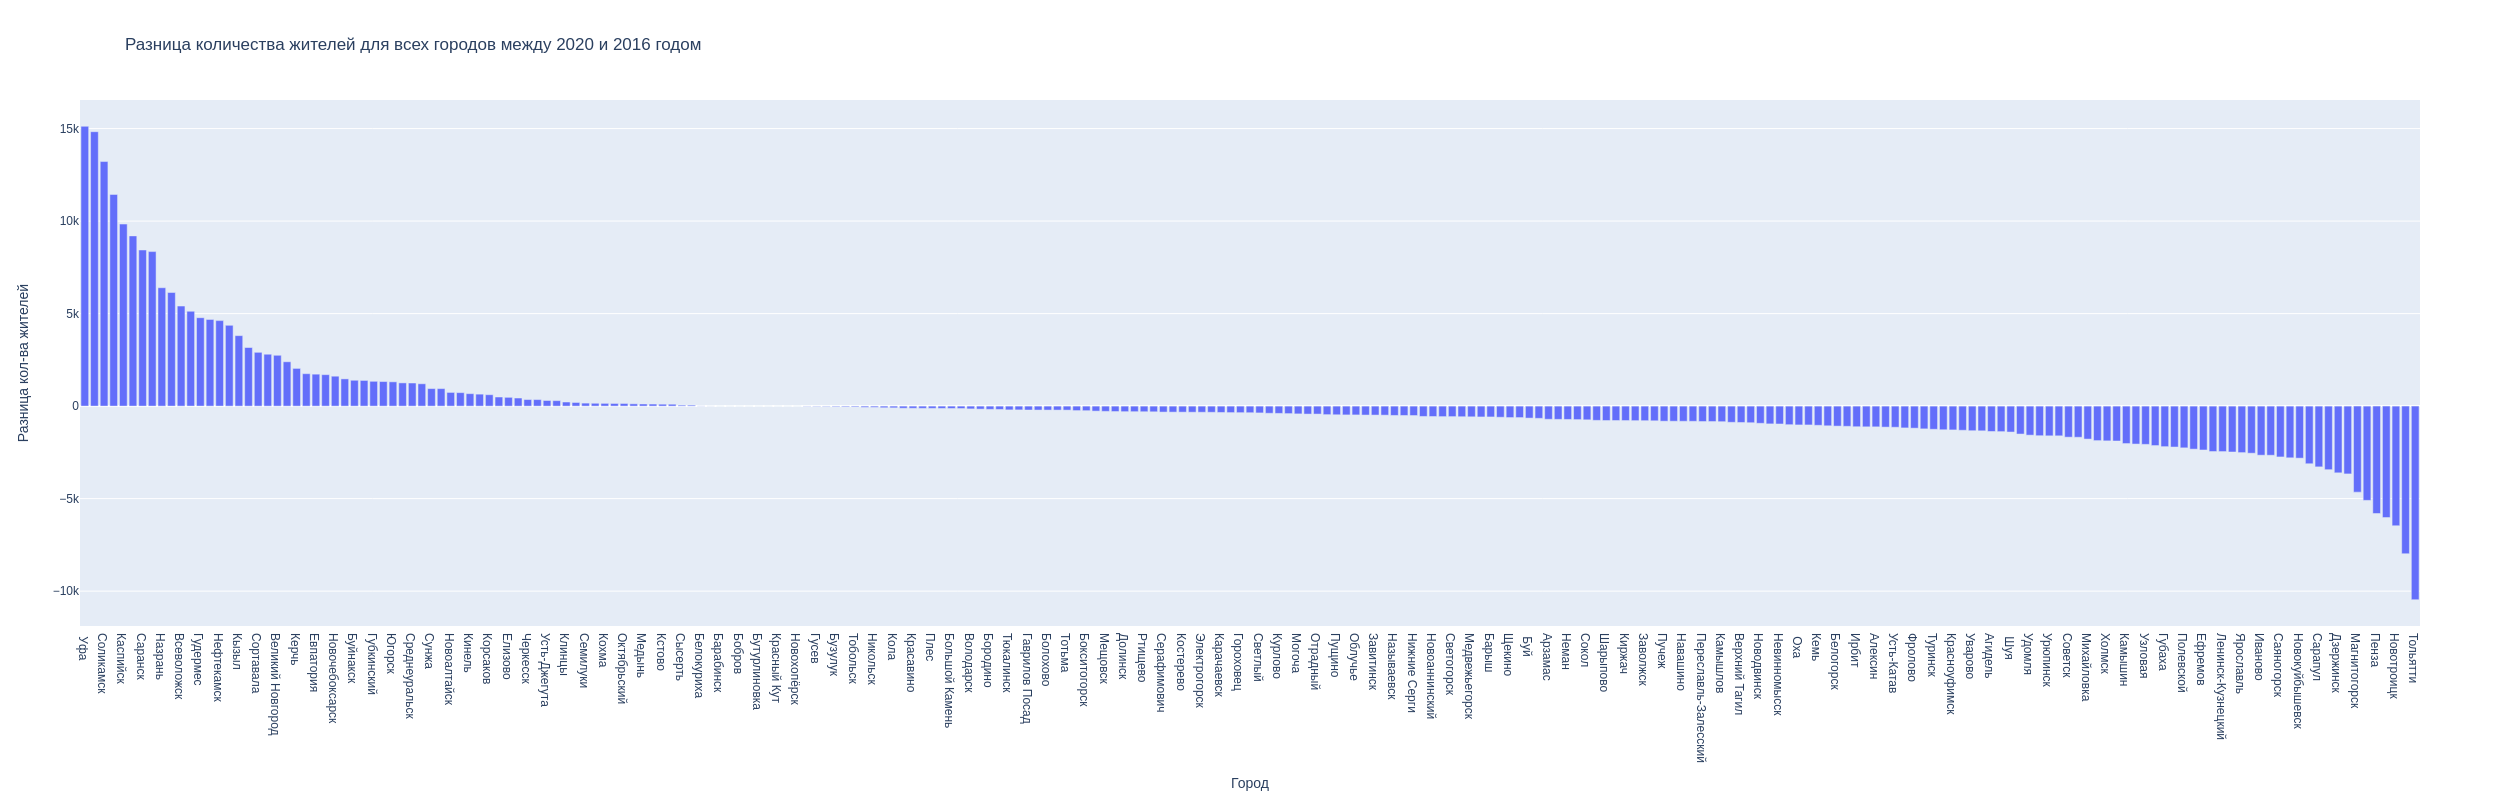

In [68]:
fig = px.bar(df_2016_2020.iloc[5:], x='Город',y = 'Разница кол-ва жителей',title = 'Разница количества жителей для всех городов между 2020 и 2016 годом', width=2500, height=800)
fig.show('png') 

**Срезав 5 городов с самой большой численностью видим более наглядный график.**

**Далее посмотрим на соотношение количества городов, по изменению жителей (положительная/отрицательная/нулевая прибавка).**

In [69]:
increased = len(df_2016_2020.loc[df_2016_2020['Разница кол-ва жителей'] > 0])
unchanged = len(df_2016_2020.loc[df_2016_2020['Разница кол-ва жителей'] == 0])
decreased = len(df_2016_2020.loc[df_2016_2020['Разница кол-ва жителей'] < 0])

df_2016_2020_bar = pd.DataFrame({'Изменение количества жителей': ['Увеличилось', 'Не изменилось', 'Уменьшилось'], 'Количество таких городов': [increased, unchanged, decreased]})
df_2016_2020_bar

,Изменение количества жителей,Количество таких городов
0,Увеличилось,71
1,Не изменилось,9
2,Уменьшилось,168


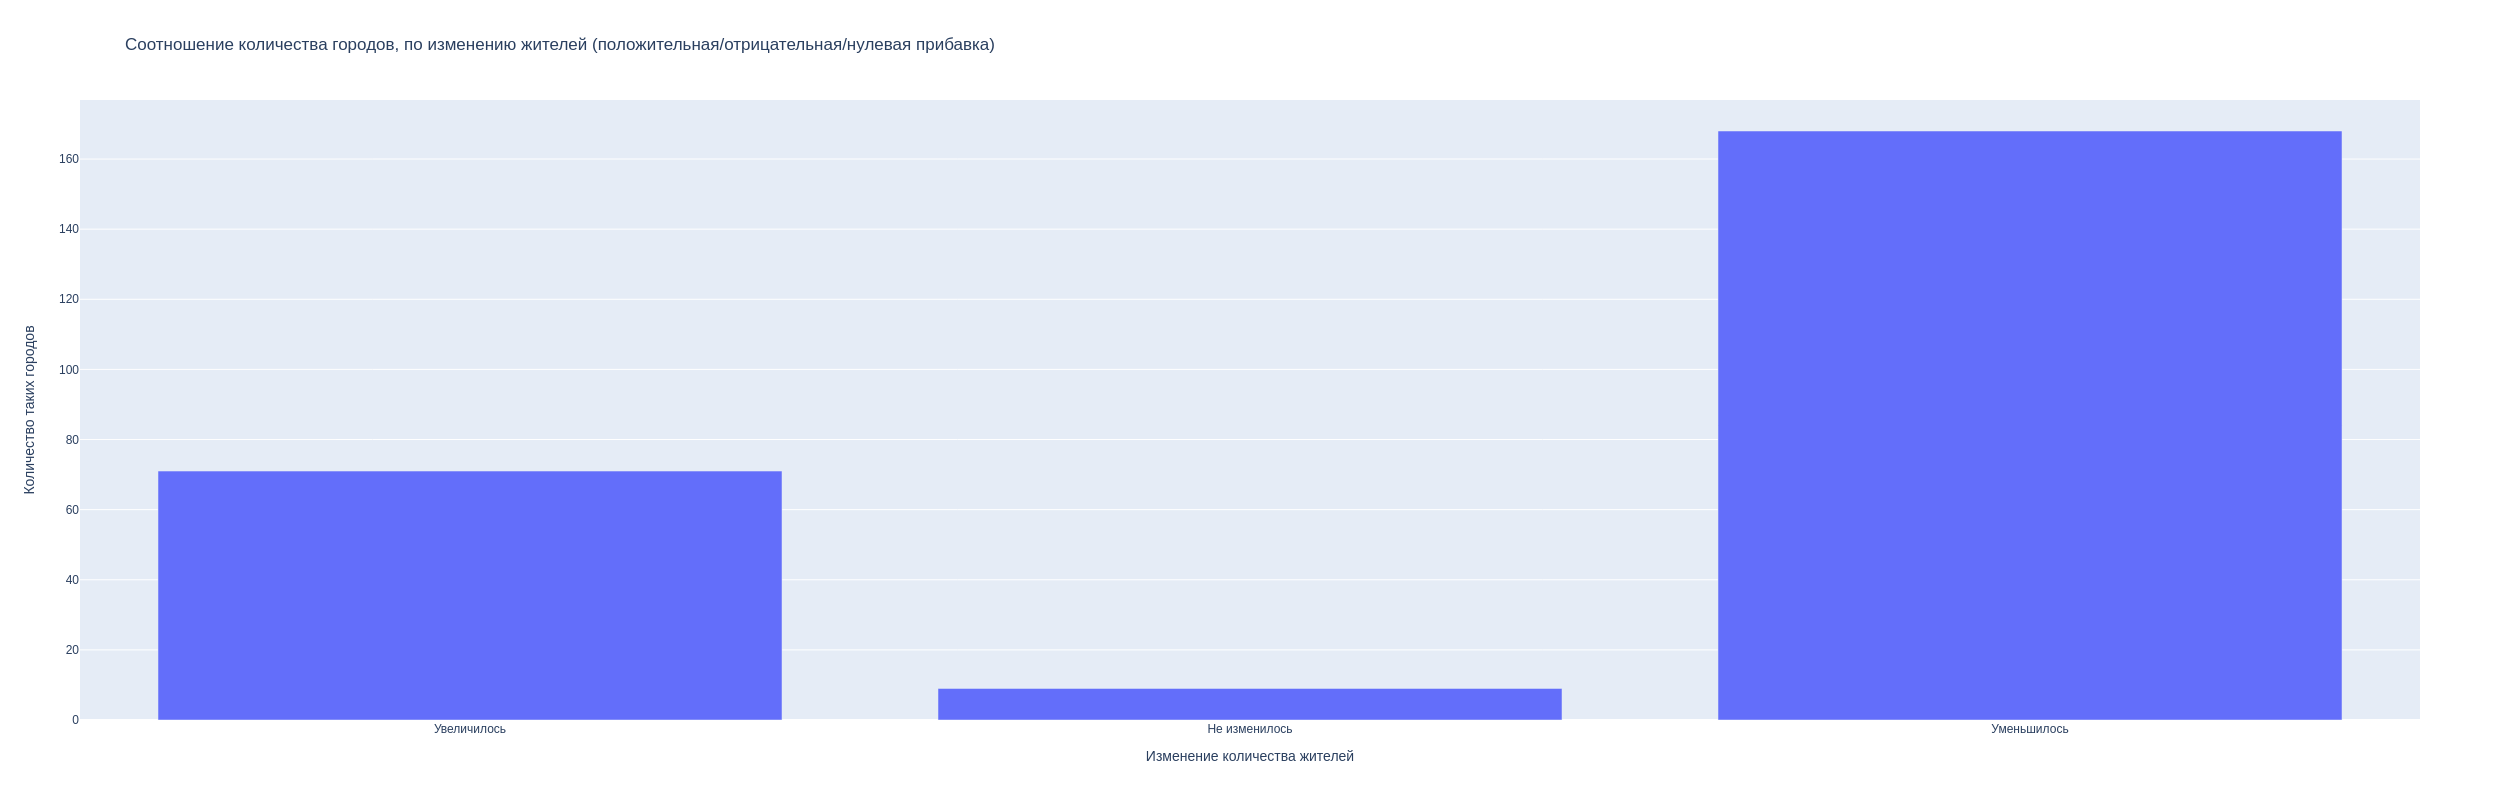

In [70]:
fig = px.bar(df_2016_2020_bar, x="Изменение количества жителей", y="Количество таких городов", title="Соотношение количества городов, по изменению жителей (положительная/отрицательная/нулевая прибавка)", width=2500, height=800)
fig.show('png')

**Видим, что возросло количество городов, в которых уменьшилось количество жителей, при этом также уменьшилось число городов, в которых увеличилось количество жителей. Возможно это связано с тем, что жители мигрировали в города, которых нет в этом списке. Также по коэффициенту рождаемости взятому из Википедии, видно, что СКР начал падать с 2015 по 2020 год, значит убыль населения в городах в том числе связана с этим.**

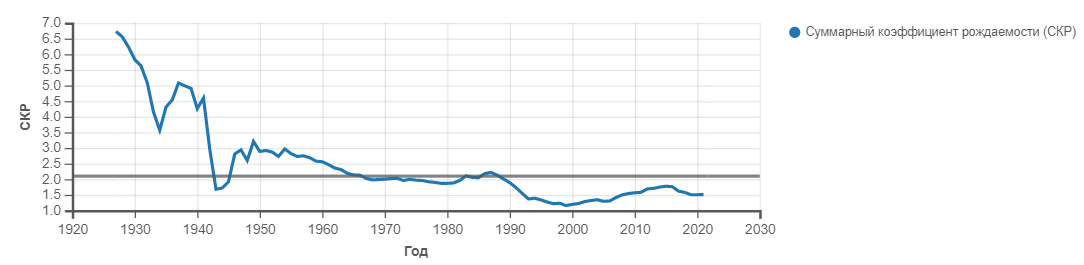

**Сравним множества городов и найдем какое количество городов осталось в тех же категориях(Увеличилось,Не изменилось,Уменьшилось).**

In [71]:
set_of_increased_2012_2016 = set(df_2012_2016.loc[df_2012_2016['Разница кол-ва жителей'] > 0]['Город'].values)
set_of_unchanged_2012_2016 = set(df_2012_2016.loc[df_2012_2016['Разница кол-ва жителей'] == 0]['Город'].values)
set_of_decreased_2012_2016 = set(df_2012_2016.loc[df_2012_2016['Разница кол-ва жителей'] < 0]['Город'].values)


set_of_increased_2016_2020 = set(df_2016_2020.loc[df_2016_2020['Разница кол-ва жителей'] > 0]['Город'].values)
set_of_unchanged_2016_2020 = set(df_2016_2020.loc[df_2016_2020['Разница кол-ва жителей'] == 0]['Город'].values)
set_of_decreased_2016_2020 = set(df_2016_2020.loc[df_2016_2020['Разница кол-ва жителей'] < 0]['Город'].values)

In [72]:
print('Количество городов, количество жителей которых увеличивалось и в период с 2012 по 2016 ,и в период с 2016 по 2020:', len(set_of_increased_2016_2020 & set_of_increased_2012_2016))
print('Список городов, количество жителей которых увеличивалось и в период с 2012 по 2016 ,и в период с 2016 по 2020:', '\n', set_of_increased_2016_2020 & set_of_increased_2012_2016, '\n', '\n', '\n')

print('Количество городов, количество жителей которых не изменялось и в период с 2012 по 2016 ,и в период с 2016 по 2020:', len(set_of_unchanged_2016_2020 & set_of_unchanged_2012_2016))
print('Список городов, количество жителей которых не изменялось и в период с 2012 по 2016 ,и в период с 2016 по 2020:', '\n', set_of_unchanged_2016_2020 & set_of_unchanged_2012_2016, '\n', '\n', '\n')

print('Количество городов, количество жителей которых уменьшалось и в период с 2012 по 2016 ,и в период с 2016 по 2020:', len(set_of_decreased_2016_2020 & set_of_decreased_2012_2016))
print('Список городов, количество жителей которых уменьшалось и в период с 2012 по 2016 ,и в период с 2016 по 2020:', '\n', set_of_decreased_2016_2020 & set_of_decreased_2012_2016)

Количество городов, количество жителей которых увеличивалось и в период с 2012 по 2016 ,и в период с 2016 по 2020: 49
Список городов, количество жителей которых увеличивалось и в период с 2012 по 2016 ,и в период с 2016 по 2020: 
 {'Реутов', 'Ялта', 'Магас', 'Кохма', 'Краснодар', 'Ессентуки', 'Якутск', 'Москва', 'Ульяновск', 'Нягань', 'Анапа', 'Карабулак', 'Анадырь', 'Новоалтайск', 'Кинель', 'Керчь', 'Химки', 'Югорск', 'Кызыл', 'Клинцы', 'Назрань', 'Саранск', 'Среднеуральск', 'Оренбург', 'Октябрьский', 'Белокуриха', ' Уфа', 'Ялуторовск', 'Томск', 'Великий Новгород', 'Электросталь', 'Березовский', 'Нефтекамск', 'Набережные Челны', 'Гудермес', 'Усть-Джегута', 'Новочебоксарск', 'Буйнакск', 'Сысерть', 'Алушта', 'Каспийск', 'Бирюч', 'Семилуки', 'Кстово', 'Кизилюрт', 'Губкинский', 'Чебоксары', 'Железногорск', 'Лянтор'} 
 
 

Количество городов, количество жителей которых не изменялось и в период с 2012 по 2016 ,и в период с 2016 по 2020: 8
Список городов, количество жителей которых не изменя

**Посмотрев на результаты сравнения промежутков 2012-2016 и 2016-2020, видим, что для большинства городов тенденция изменения количества жителей для большинства городов сохраняется.** 

**Далее посмотрим на 10 городов с самой большой прибавкой и 10 городов с самым большим оттоком.**

In [73]:
print("10 городов с самой большой прибавкой населения", '\n')
df_2016_2020.head(10)

10 городов с самой большой прибавкой населения 



,index,Город,Разница кол-ва жителей
0,130,Москва,347953.0
1,2,Краснодар,56606.0
2,133,Коломна,40128.0
3,246,Якутск,20800.0
4,3,Анапа,15689.0
5,213,Уфа,15123.0
6,136,Химки,14831.0
7,156,Соликамск,13218.0
8,242,Чебоксары,11442.0
9,218,Каспийск,9840.0


**Видим, что в сравнении с 2012-2016 из топ 10 ушли: Томск, Михайловка и Назрань,
при этом появились: Коломна, Соликамск и Каспийск.**

**На примере коломны это может быть связано с тем, что "Коломна участвует в программе «Развитие комфортной городской среды» которая стартовала в 2017 году. В рамках программы были созданы проекты благоустройства дворовых территорий. Администрация муниципалитета начала работу по программе с обсуждения проектов с жителями.**
**Создание комфортной городской среды способствует развитию малого бизнеса. Создаются небольшие кафе, ресторанчики и музеи. За последние семь лет в Коломне было создано 23 новых музея, и все они частные."(цитата из http://www.russmp.ru/stat18-1-1.php)**

**В связи с чем можно сказать, что программы развития городов делают города привлекательнее и прирост жителей резко возрастает, позволяя попасть в топ 10 городов по приросту, сразу после таких крупных городов, как Москва и Краснодар.**

In [74]:
print("10 городов с самой большой убылью населения", '\n')
df_2016_2020.tail(10)

10 городов с самой большой убылью населения 



,index,Город,Разница кол-ва жителей
238,155,Лысьва,-3436.0
239,59,Дзержинск,-3606.0
240,17,Архангельск,-3665.0
241,205,Магнитогорск,-4650.0
242,177,Каменск-Уральский,-5095.0
243,153,Пенза,-5804.0
244,111,Сызрань,-6024.0
245,150,Новотроицк,-6467.0
246,225,Воркута,-7979.0
247,112,Тольятти,-10463.0


**Среди 10 самых плохих городов видим сохраняющихся Тольятти,Воркуту и Дзержинск**

# **Анализ самых перспективных и самых неперспективных городов за периоды 2020-2050,2050-2080,2080-2120, по показателям модели.**

## **Период 2020-2050**

In [75]:
df_model_analysis_2020_2120 = df.loc[df['year'].isin([2020, 2050, 2080, 2120])].reset_index()
df_model_analysis_2020_2120

,index,Город,year,fact,Модель,Нижняя граница,Верхняя граница,Разница между фактом и моделью,Разница между фактом и моделью в процентах
0,20,Белокуриха,2020,15176.0,15100.0,14800.0,15500.0,-76.0,-0.500791
1,50,Белокуриха,2050,NaN,18400.0,18100.0,18800.0,NaN,NaN
2,80,Белокуриха,2080,NaN,22200.0,21800.0,22600.0,NaN,NaN
3,120,Белокуриха,2120,NaN,25500.0,25100.0,25900.0,NaN,NaN
4,141,Новоалтайск,2020,74163.0,73900.0,73100.0,74700.0,-263.0,-0.354624
...,...,...,...,...,...,...,...,...,...
995,30128,Якутск,2120,NaN,1197300.0,1187700.0,1206900.0,NaN,NaN
996,30149,Облучье,2020,9484.0,9600.0,9300.0,10000.0,116.0,1.223113
997,30179,Облучье,2050,NaN,4200.0,3900.0,4600.0,NaN,NaN
998,30209,Облучье,2080,NaN,1200.0,900.0,1700.0,NaN,NaN


In [76]:
dict_2020_2050 = {}
for i in range(0,len(df_model_analysis_2008_2020)-3, 4):
  key = df_model_analysis_2020_2120['Город'].iloc[i]
  res = df_model_analysis_2020_2120['Модель'].iloc[i+1] - df_model_analysis_2020_2120['Модель'].iloc[i]
  dict_2020_2050[key] = res

dict_to_list = list(dict_2020_2050.items())
df_2020_2050 = pd.DataFrame(dict_to_list, columns = ['Город', 'Разница кол-ва жителей']).sort_values('Разница кол-ва жителей', ascending = False).reset_index()
df_2020_2050

,index,Город,Разница кол-ва жителей
0,130,Москва,1156200.0
1,133,Коломна,336500.0
2,2,Краснодар,284700.0
3,246,Якутск,192900.0
4,79,Назрань,163700.0
...,...,...,...
243,204,Ульяновск,-60100.0
244,147,Оренбург,-97500.0
245,153,Пенза,-106400.0
246,112,Тольятти,-118100.0


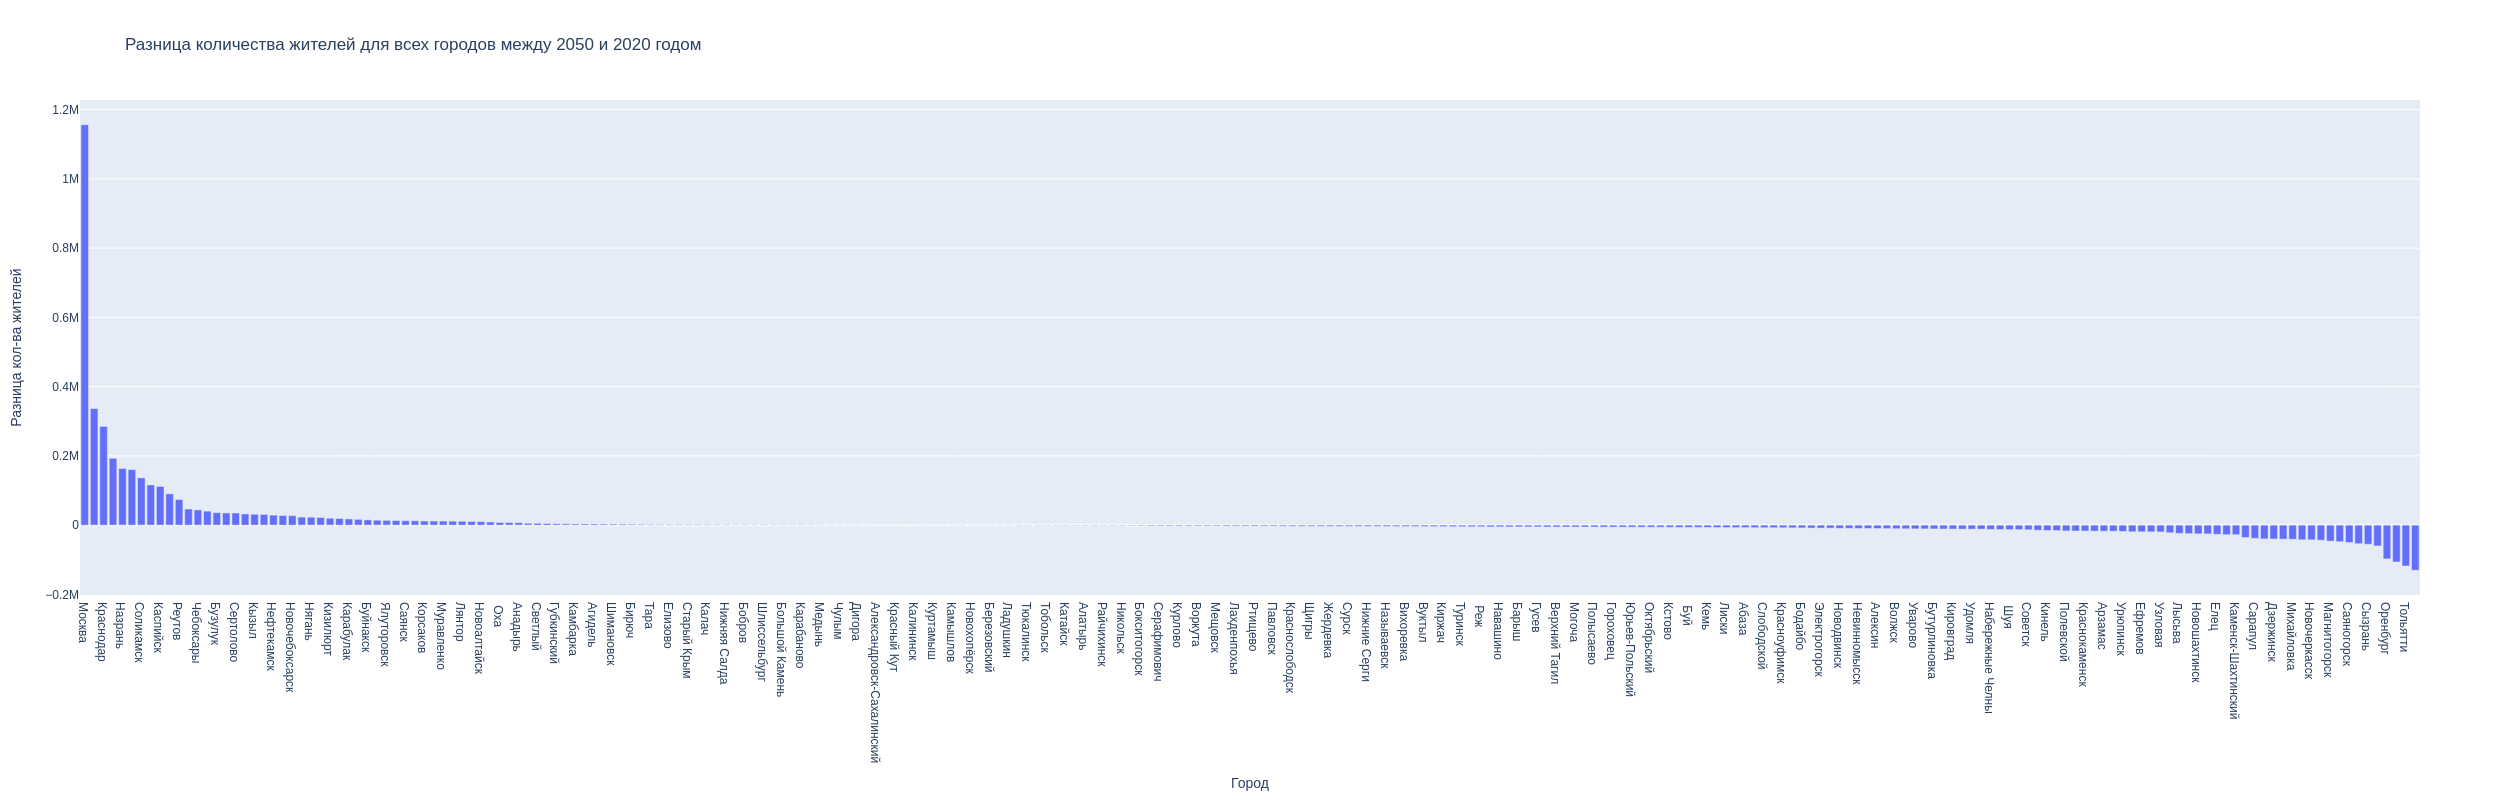

In [77]:
fig = px.bar(df_2020_2050.iloc[:], x='Город',y = 'Разница кол-ва жителей',title = 'Разница количества жителей для всех городов между 2050 и 2020 годом', width=2500, height=800)
fig.show('png') 

**График получился не очень наглядный из-за присутсвия Москвы и других больших городов, удалим несколько городов с большими значениями.**

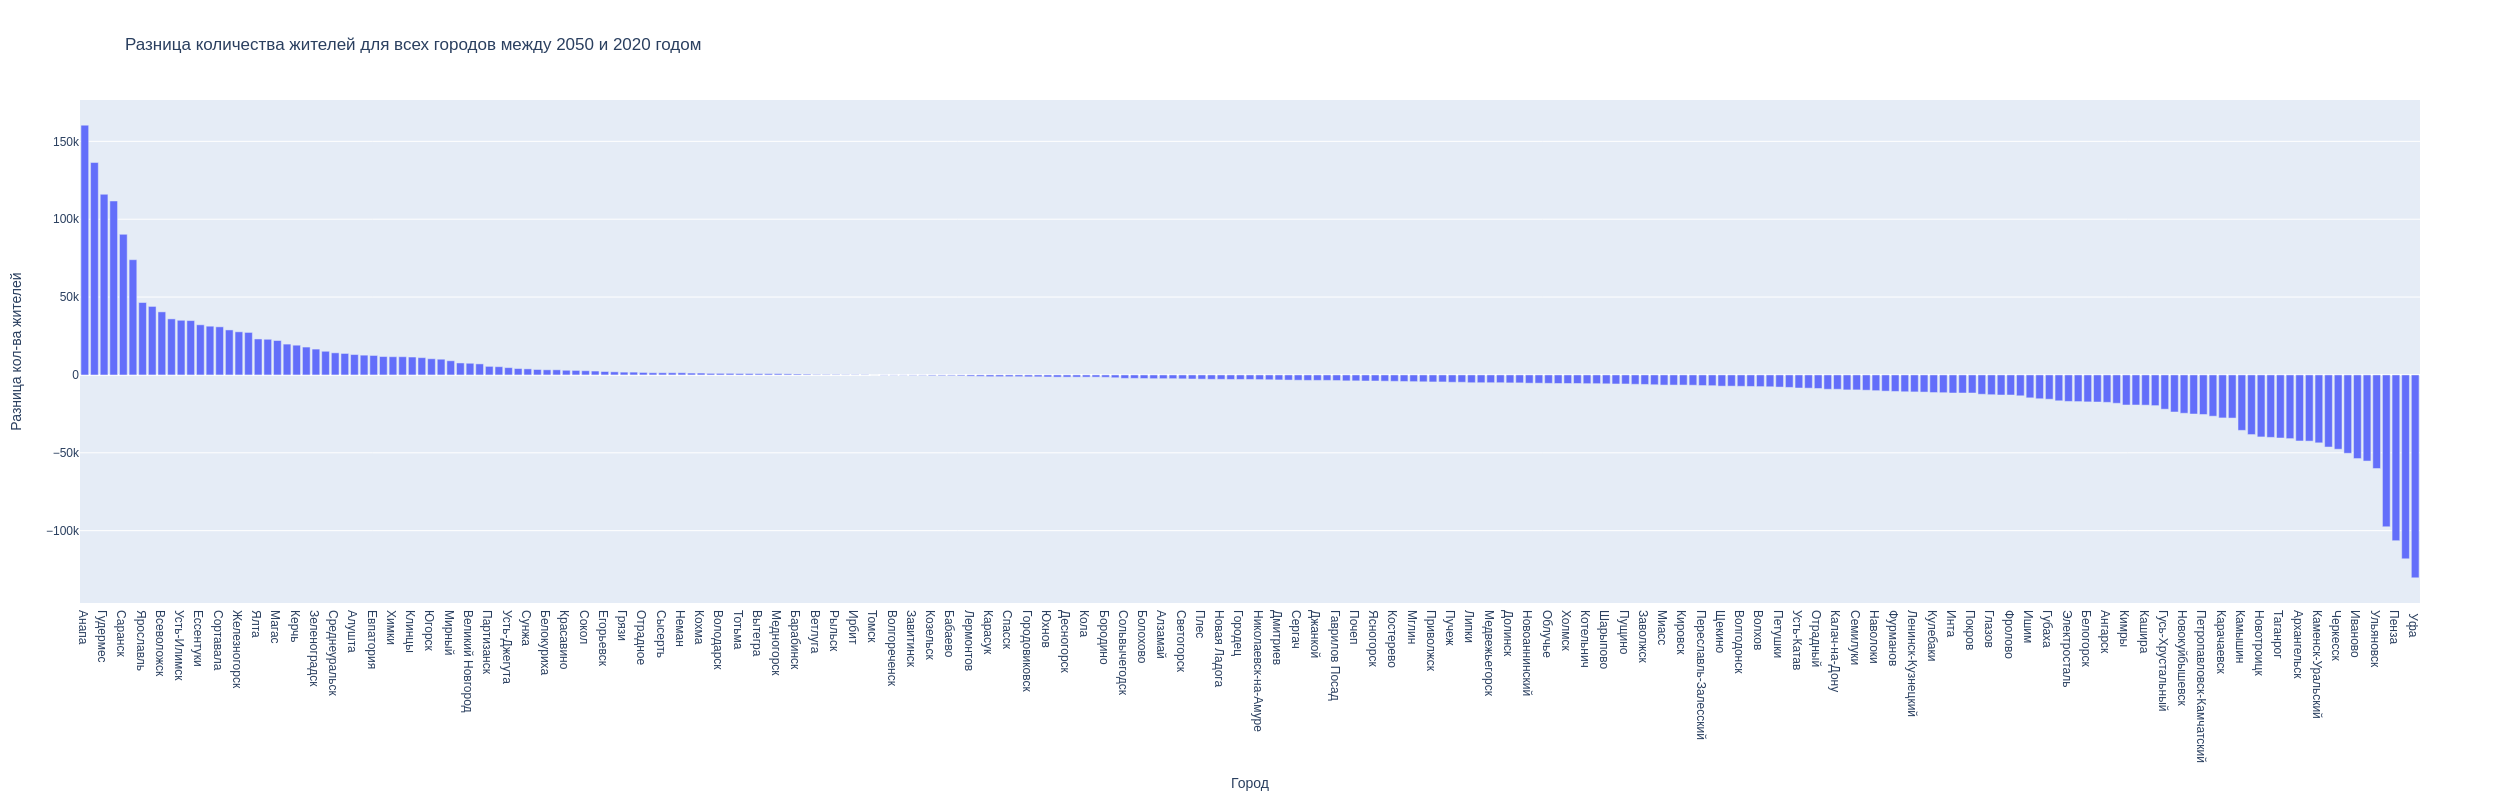

In [78]:
fig = px.bar(df_2020_2050.iloc[5:], x='Город',y = 'Разница кол-ва жителей',title = 'Разница количества жителей для всех городов между 2050 и 2020 годом', width=2500, height=800)
fig.show('png') 

**Рассмотрим топ 10 самых перспективных городов**

In [79]:
print("10 самых перспективных городов", '\n')
df_2020_2050.head(10)

10 самых перспективных городов 



,index,Город,Разница кол-ва жителей
0,130,Москва,1156200.0
1,133,Коломна,336500.0
2,2,Краснодар,284700.0
3,246,Якутск,192900.0
4,79,Назрань,163700.0
5,3,Анапа,160400.0
6,156,Соликамск,136400.0
7,241,Гудермес,116000.0
8,218,Каспийск,111700.0
9,229,Саранск,90300.0


In [80]:
print("10 самых неперспективных городов", '\n')
df_2020_2050.tail(10)

10 самых неперспективных городов 



,index,Город,Разница кол-ва жителей
238,205,Магнитогорск,-46300.0
239,232,Черкесск,-47700.0
240,240,Саяногорск,-50300.0
241,69,Иваново,-53700.0
242,111,Сызрань,-55300.0
243,204,Ульяновск,-60100.0
244,147,Оренбург,-97500.0
245,153,Пенза,-106400.0
246,112,Тольятти,-118100.0
247,213,Уфа,-130300.0


**Из удивительных фактов, модель говорит нам о том, что Уфа, которая по фактическим значениям была в топ 10 по приросту за все периоды по 4 года с 2008 по 2020, оказывается на последнем месте по приросту населения в период с 2020 по 2050 год, из нее уедет 130300 человек.**

## **Период 2050-2080**

In [81]:
dict_2050_2080 = {}
for i in range(1,len(df_model_analysis_2008_2020)-2, 4):
  key = df_model_analysis_2020_2120['Город'].iloc[i]
  res = df_model_analysis_2020_2120['Модель'].iloc[i+1] - df_model_analysis_2020_2120['Модель'].iloc[i]
  dict_2050_2080[key] = res

dict_to_list = list(dict_2050_2080.items())
df_2050_2080 = pd.DataFrame(dict_to_list, columns = ['Город', 'Разница кол-ва жителей']).sort_values('Разница кол-ва жителей', ascending = False).reset_index()
df_2050_2080

,index,Город,Разница кол-ва жителей
0,130,Москва,847200.0
1,241,Гудермес,415500.0
2,133,Коломна,350800.0
3,79,Назрань,319800.0
4,246,Якутск,292200.0
...,...,...,...
243,204,Ульяновск,-78900.0
244,153,Пенза,-104000.0
245,112,Тольятти,-119000.0
246,147,Оренбург,-126400.0


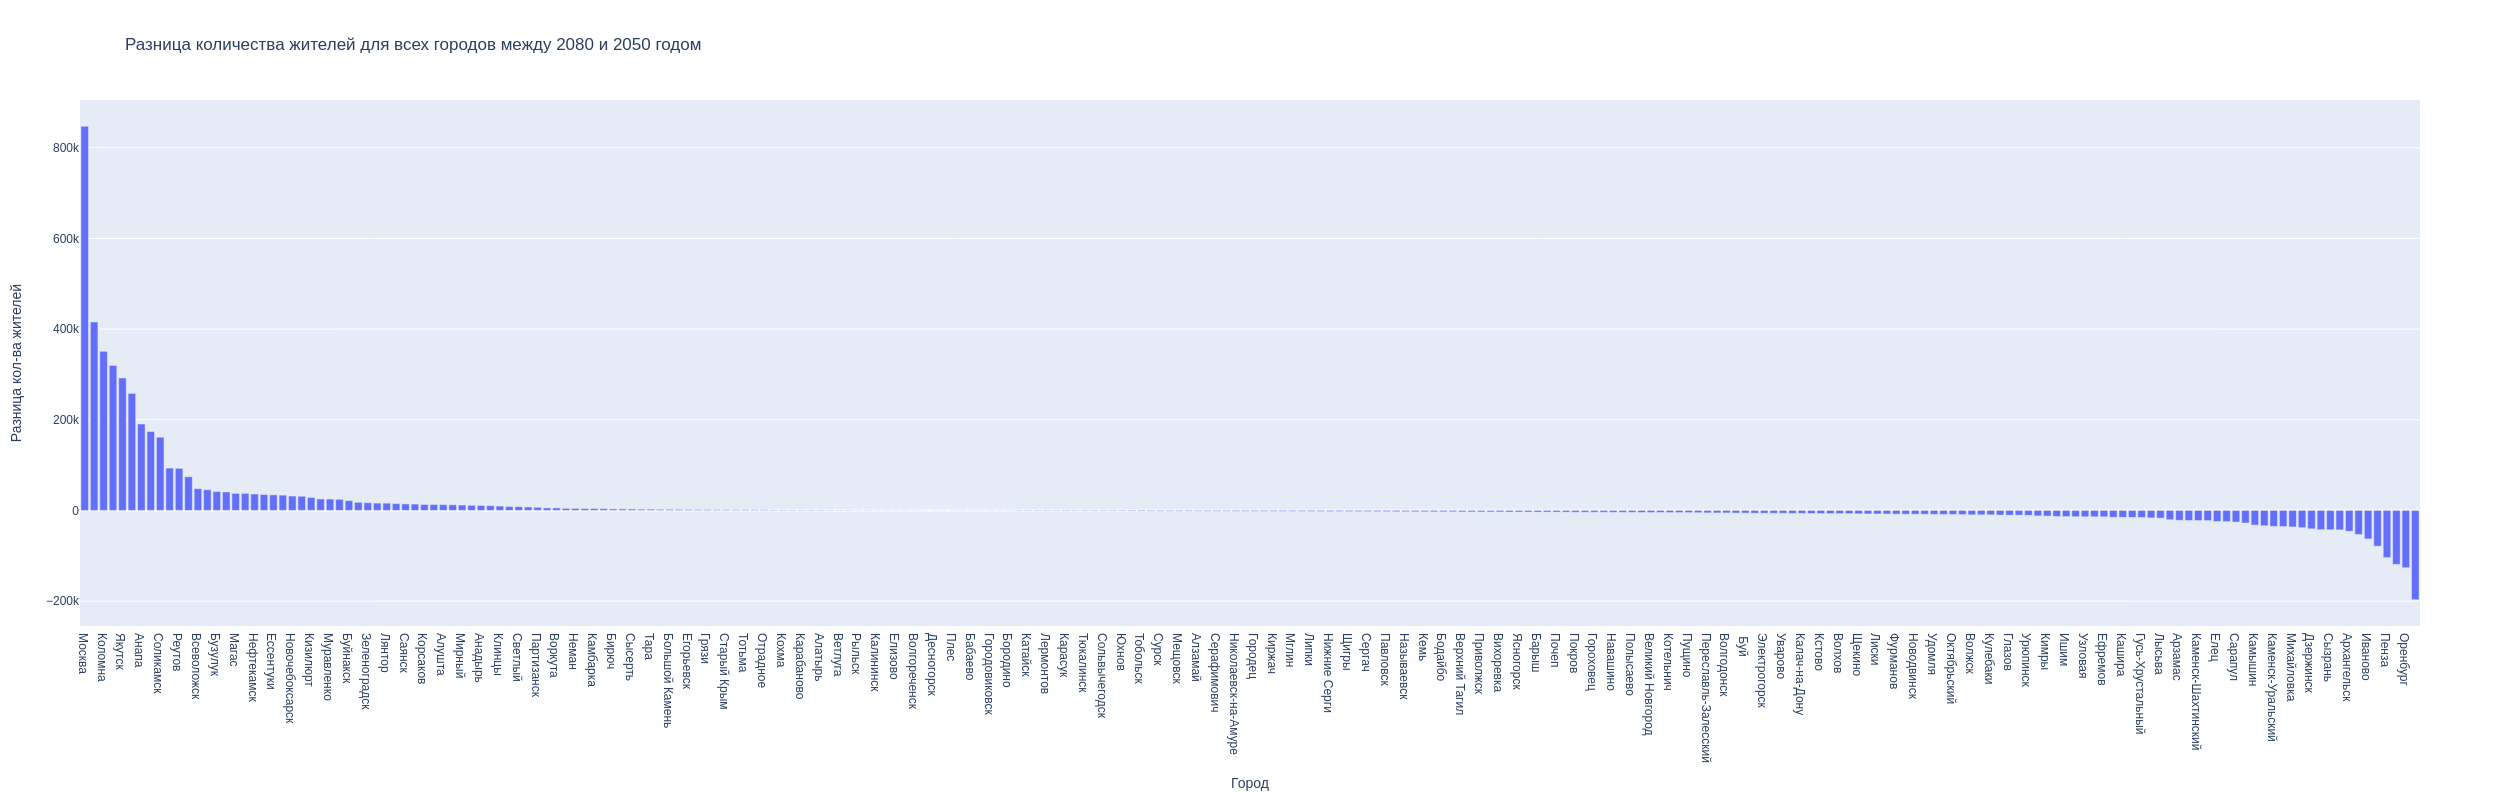

In [82]:
fig = px.bar(df_2050_2080.iloc[:], x='Город',y = 'Разница кол-ва жителей',title = 'Разница количества жителей для всех городов между 2080 и 2050 годом', width=2500, height=800)
fig.show('png') 

**График получился не очень наглядный из-за присутсвия Москвы и других больших городов, удалим несколько городов с большими значениями.**

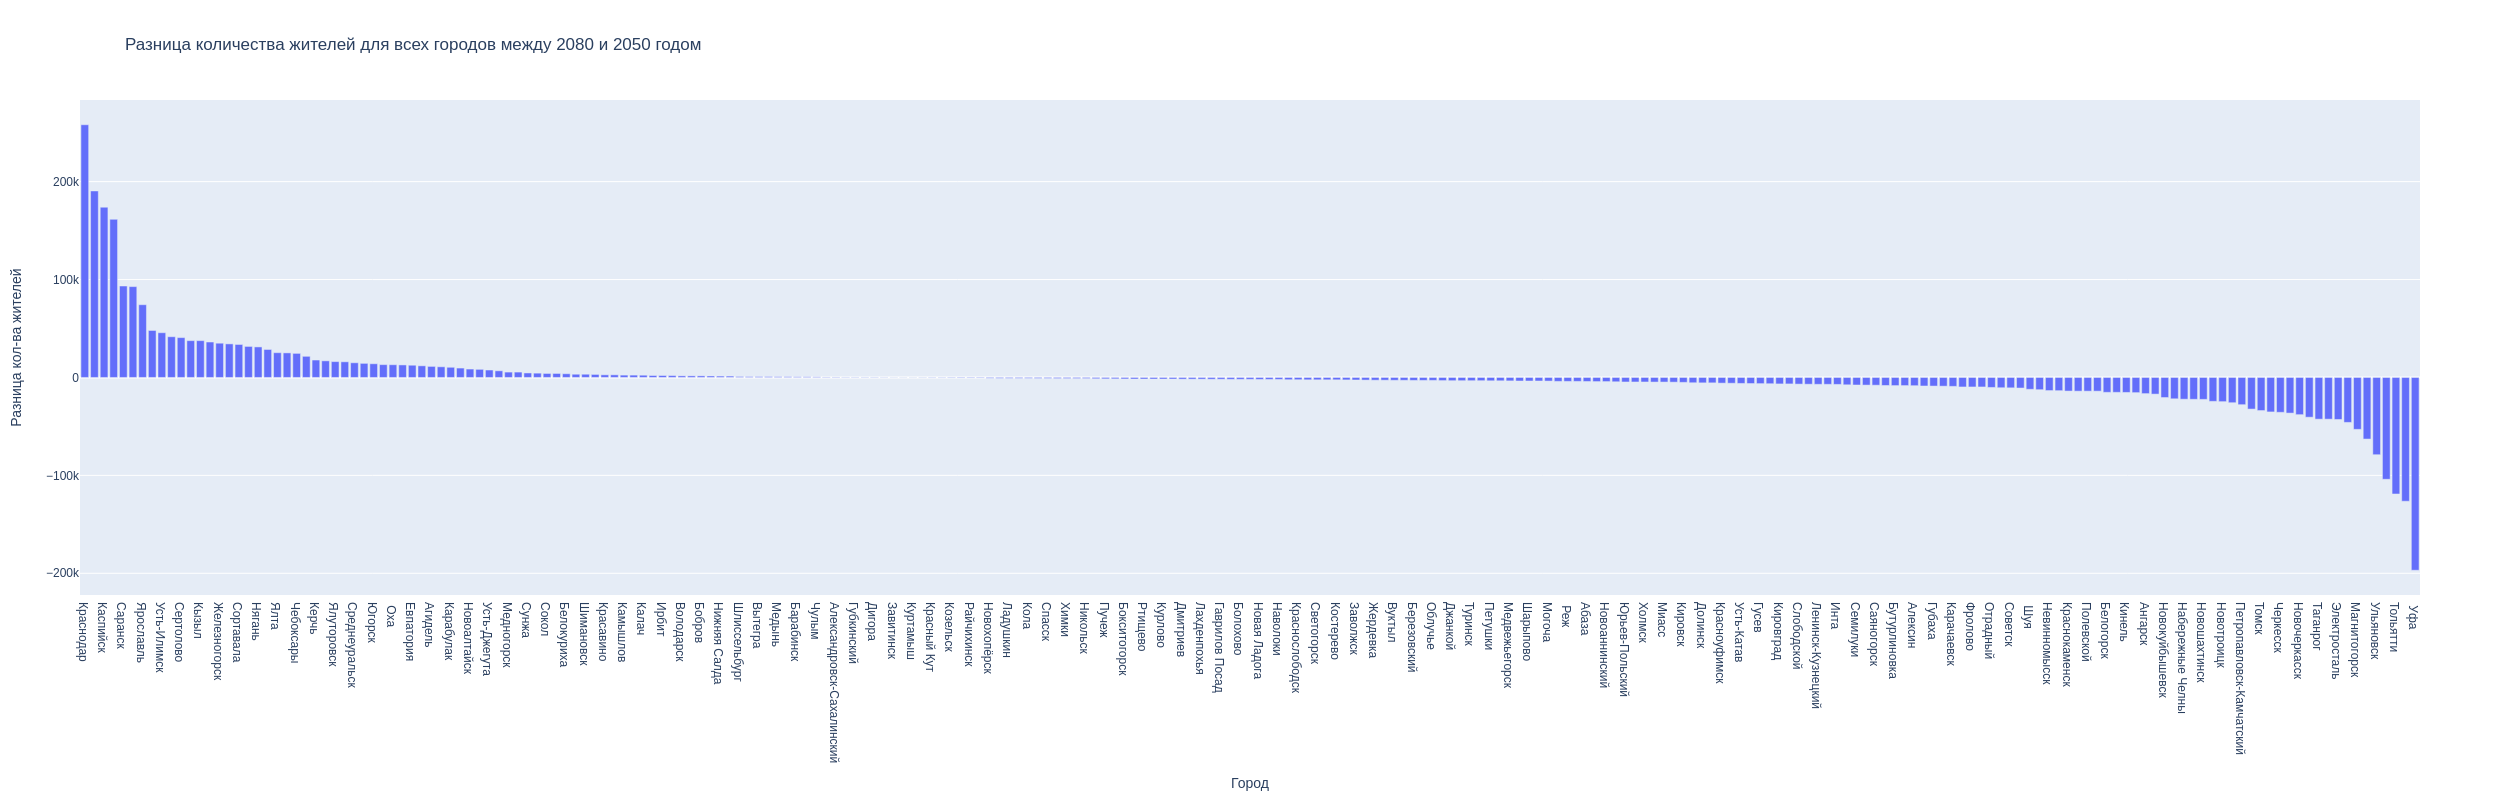

In [83]:
fig = px.bar(df_2050_2080.iloc[5:], x='Город',y = 'Разница кол-ва жителей',title = 'Разница количества жителей для всех городов между 2080 и 2050 годом', width=2500, height=800)
fig.show('png') 

**Рассмотрим топ 10 самых перспективных городов**

In [84]:
print("10 самых перспективных городов", '\n')
df_2050_2080.head(10)

10 самых перспективных городов 



,index,Город,Разница кол-ва жителей
0,130,Москва,847200.0
1,241,Гудермес,415500.0
2,133,Коломна,350800.0
3,79,Назрань,319800.0
4,246,Якутск,292200.0
5,2,Краснодар,258100.0
6,3,Анапа,190500.0
7,218,Каспийск,173900.0
8,156,Соликамск,161500.0
9,229,Саранск,93400.0


**Видим, что топ 10 полностью сохранился в таком же составе, что и в 2020-2050, только в другом порядке.**

In [85]:
print("10 самых неперспективных городов", '\n')
df_2050_2080.tail(10)

10 самых неперспективных городов 



,index,Город,Разница кол-ва жителей
238,111,Сызрань,-42600.0
239,137,Электросталь,-42900.0
240,17,Архангельск,-45900.0
241,205,Магнитогорск,-53000.0
242,69,Иваново,-62900.0
243,204,Ульяновск,-78900.0
244,153,Пенза,-104000.0
245,112,Тольятти,-119000.0
246,147,Оренбург,-126400.0
247,213,Уфа,-196900.0


**В топ 10 самых неперспективных городов произошли небольшие изменения с 2020-2050, ушли Черкесск и Саяногорск, а появились Электросталь и Архангельск, Уфа все также сильнее всех теряет людей...**

**Модель сохраняет за собой тенденцию сильно поддерживать результаты топ 10 самых перспективных, так как и на фактических данных часто сохранялись топ 10 перспективных, однако топ 10 неперспективных по фактическим данным очень часто изменялись, чего нельзя сказать о модели, эту тенденцию она не сохраняет.**

## **Период 2080-2120**

In [86]:
dict_2080_2120 = {}
for i in range(2,len(df_model_analysis_2008_2020)-1, 4):
  key = df_model_analysis_2020_2120['Город'].iloc[i]
  res = df_model_analysis_2020_2120['Модель'].iloc[i+1] - df_model_analysis_2020_2120['Модель'].iloc[i]
  dict_2080_2120[key] = res

dict_to_list = list(dict_2080_2120.items())
df_2080_2120 = pd.DataFrame(dict_to_list, columns = ['Город', 'Разница кол-ва жителей']).sort_values('Разница кол-ва жителей', ascending = False).reset_index()
df_2080_2120

,index,Город,Разница кол-ва жителей
0,241,Гудермес,1860600.0
1,130,Москва,782400.0
2,79,Назрань,505200.0
3,246,Якутск,374300.0
4,133,Коломна,317700.0
...,...,...,...
243,204,Ульяновск,-72600.0
244,153,Пенза,-81900.0
245,112,Тольятти,-98300.0
246,147,Оренбург,-100400.0


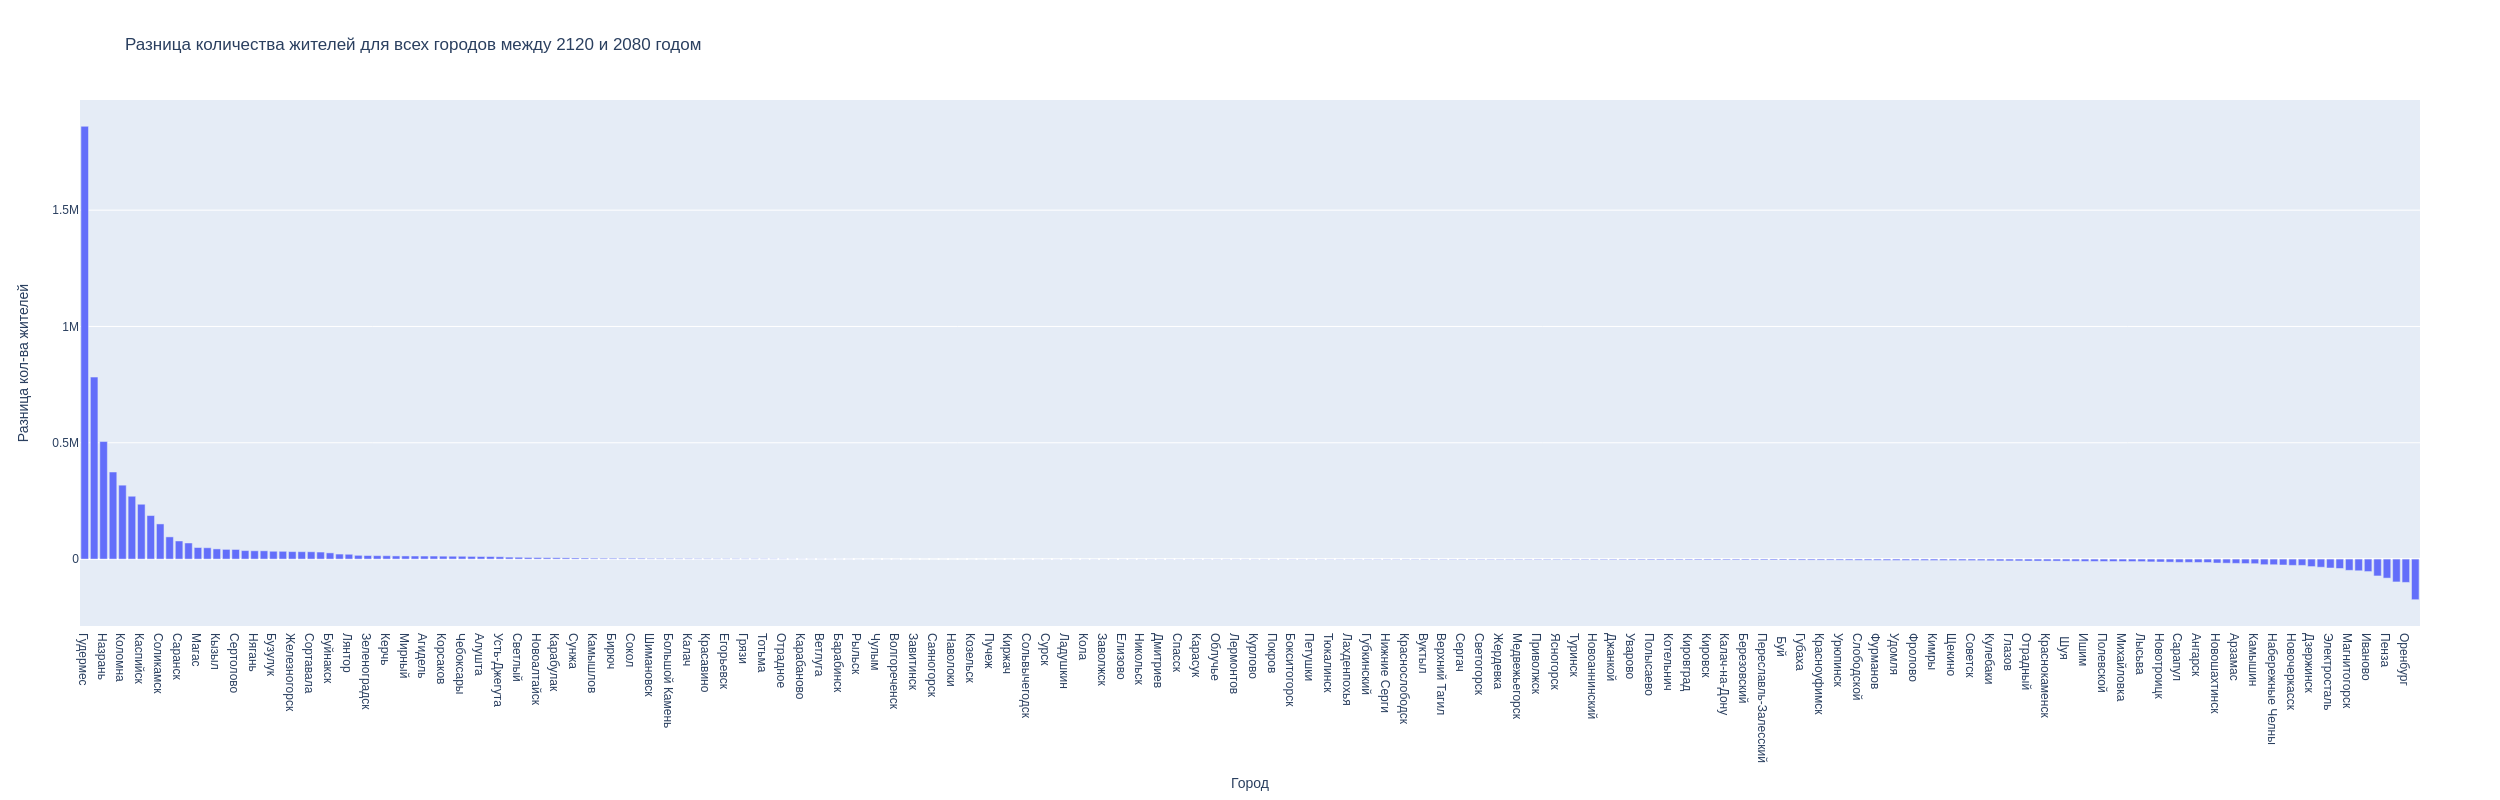

In [87]:
fig = px.bar(df_2080_2120.iloc[:], x='Город',y = 'Разница кол-ва жителей',title = 'Разница количества жителей для всех городов между 2120 и 2080 годом', width=2500, height=800)
fig.show('png') 

**График получился не очень наглядный из-за присутсвия Москвы и других больших городов, удалим несколько городов с большими значениями.**

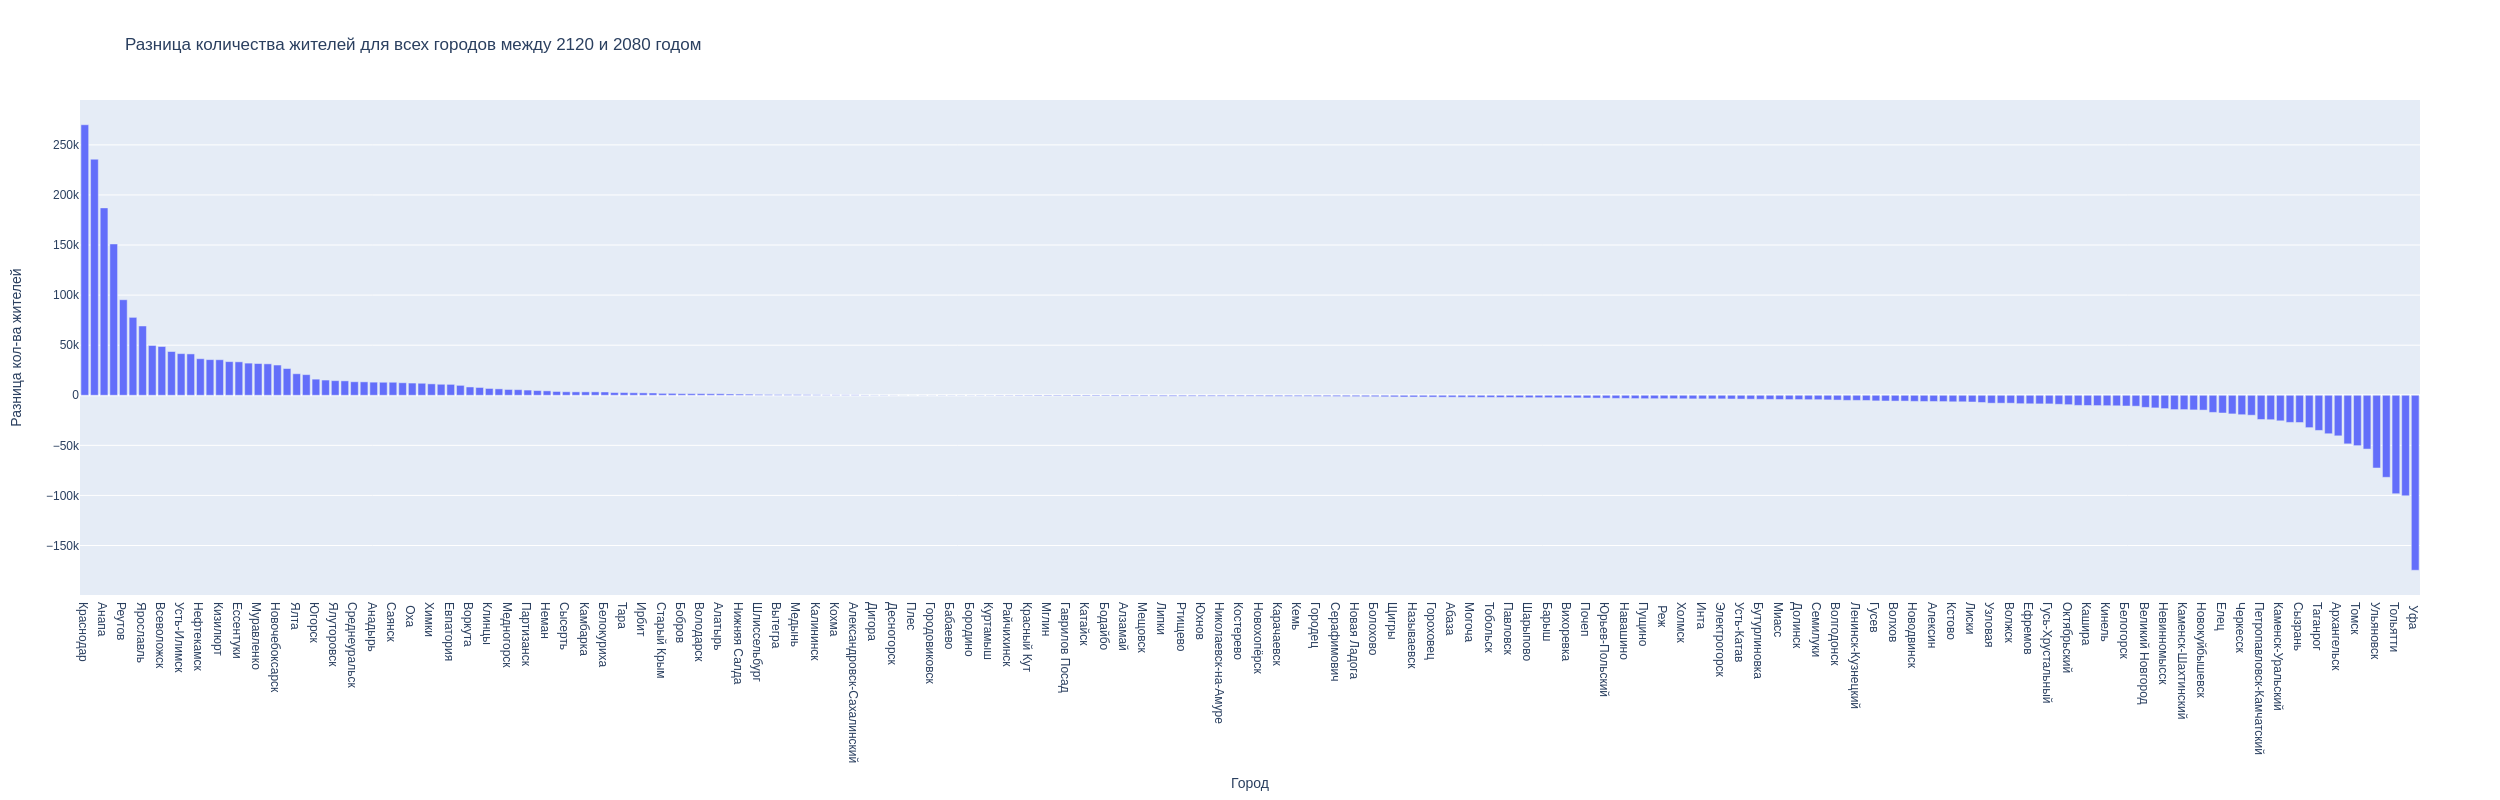

In [88]:
fig = px.bar(df_2080_2120.iloc[5:], x='Город',y = 'Разница кол-ва жителей',title = 'Разница количества жителей для всех городов между 2120 и 2080 годом', width=2500, height=800)
fig.show('png') 

**Рассмотрим топ 10 самых перспективных городов**

In [89]:
print("10 самых перспективных городов", '\n')
df_2080_2120.head(10)

10 самых перспективных городов 



,index,Город,Разница кол-ва жителей
0,241,Гудермес,1860600.0
1,130,Москва,782400.0
2,79,Назрань,505200.0
3,246,Якутск,374300.0
4,133,Коломна,317700.0
5,2,Краснодар,270100.0
6,218,Каспийск,235700.0
7,3,Анапа,187100.0
8,156,Соликамск,151100.0
9,135,Реутов,95400.0


**Замечаем, что модель говорит нам о том,что гудермес в каждый из периодов 2020-2050,2050-2080,2080-2120 поднимался в топ 10 и к 2120 году по приросту населения обогнал Москву, что очень интересно.**

**При этом топ 10 покинул Саранск и появился Реутов, в сравнении с 2050-2080.**

**Рассмотрим топ 10 самых неперспективных городов**

In [90]:
print("10 самых перспективных городов", '\n')
df_2080_2120.tail(10)

10 самых перспективных городов 



,index,Город,Разница кол-ва жителей
238,137,Электросталь,-38400.0
239,17,Архангельск,-40500.0
240,205,Магнитогорск,-48500.0
241,187,Томск,-50300.0
242,69,Иваново,-53700.0
243,204,Ульяновск,-72600.0
244,153,Пенза,-81900.0
245,112,Тольятти,-98300.0
246,147,Оренбург,-100400.0
247,213,Уфа,-174700.0


**В топ 10 самых неперспективных интересных изменений нет.**